<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:skyblue;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:black;
              text-align:center;'>
         CUSTOMER CHURN ANALYSIS
    </h2>
    </div>

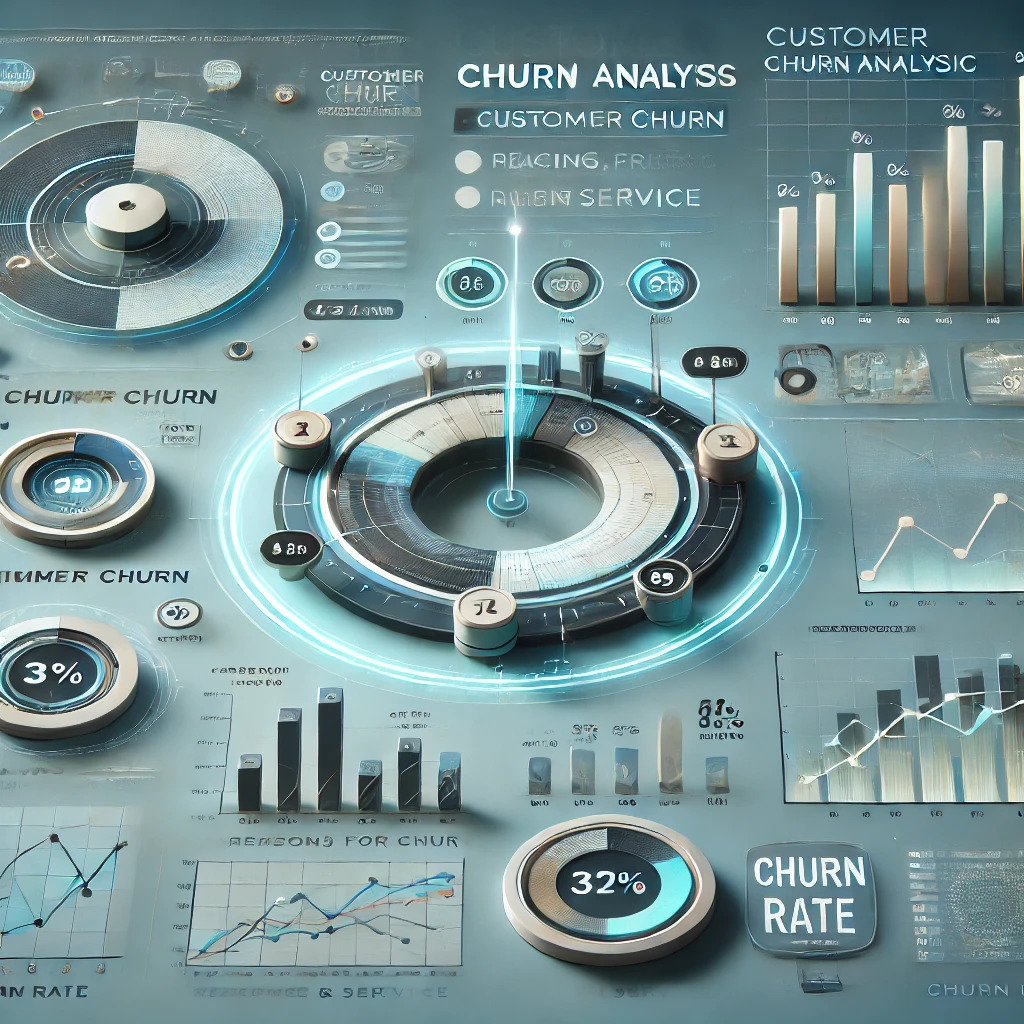

Dataset Description:
 
 The dataset contains the following fields:
 
 ● **CustomerID:** Unique identifier for each customer.
 
 ● **Gender:** Male or Female.
 
 ● **SeniorCitizen:** Whether the customer is a senior citizen (1) or not (0).
 
 ● **Partner:** Whether the customer has a partner (Yes or No).
 
 ● **Dependents:** Whether the customer has dependents (Yes or No).
 
 ● **Tenure:** Number of months the customer has stayed with the company.
 
 ● **PhoneService:** Whether the customer has phone service (Yes or No).
 
 ● **MultipleLines:** Whether the customer has multiple lines (Yes, No, No phone service).
 
 ● **InternetService:** Customer’s internet service provider (DSL, Fiber optic, No).
 
 ● **OnlineSecurity:** Whether the customer has online security service (Yes, No, Nointernet service).
 
 ● **OnlineBackup:** Whether the customer has online backup (Yes, No, No internetservice).
 
 ● **DeviceProtection:** Whether the customer has device protection (Yes, No, No internetservice).
 
 ● **TechSupport:** Whether the customer has tech support (Yes, No, No internet service).
 
 ● **StreamingTV:** Whether the customer streams TV (Yes, No, No internet service).
 
 ● **StreamingMovies:** Whether the customer streams movies (Yes, No, No internetservice).
 
 ● **Contract:** Type of customer contract (Month-to-month, One year, Two year).
 
 ● **PaperlessBilling:** Whether the customer uses paperless billing (Yes or No).
 
 ● **PaymentMethod:** Customer’s payment method (Electronic check, Mailed check, Banktransfer, Credit card).
 
 ● **MonthlyCharges:** The amount charged to the customer monthly.
 
 ● **TotalCharges:** The total amount charged to the customer.
 
 ● **Churn:** Whether the customer has churned (Yes or No)

# loading the Basic libraries

In [1]:
import pandas as pd                                     # To work on data manipulation 
import numpy as np                                      # It is used for numerical python
import seaborn as sns                                   # For Visualization
import matplotlib.pyplot as plt                         # For Visualization
from warnings import filterwarnings
filterwarnings('ignore')
from scipy import stats

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# pipeline
from sklearn.pipeline import Pipeline
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score

In [2]:
df = pd.read_csv(r"C:\Users\shiva\Downloads\WA_Fn-UseC_-Telco-Customer-Churn (1).csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#shape of the dataset
df.shape

(7043, 21)

In [4]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#description of the dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


##### Checking for duplicates

In [6]:
#duplicate values in the dataset
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [7]:
# missing values in the dataset
# Create a dictionary to store the information about the dataset

info_dict = { 
    
    'Column': df.columns.tolist(),    # Store the column names in a list
    
    'Non-Null Count': df.count().tolist(), # Store the count of non-null values for each column
    
    'Dtype': df.dtypes.tolist(), # Store the data types of each column
    
    'Null_Percentage' : np.round(( df.shape[0] - df.count()) * 100 / df.shape[0]) # Calculate the percentage of null values in each column
    
}

# Create a DataFrame from the info_dict dictionary

Description = pd.DataFrame(info_dict).reset_index(drop = True)
Description

,Column,Non-Null Count,Dtype,Null_Percentage
0,customerID,7043,object,0.0
1,gender,7043,object,0.0
2,SeniorCitizen,7043,int64,0.0
3,Partner,7043,object,0.0
4,Dependents,7043,object,0.0
5,tenure,7043,int64,0.0
6,PhoneService,7043,object,0.0
7,MultipleLines,7043,object,0.0
8,InternetService,7043,object,0.0
9,OnlineSecurity,7043,object,0.0


<Axes: >

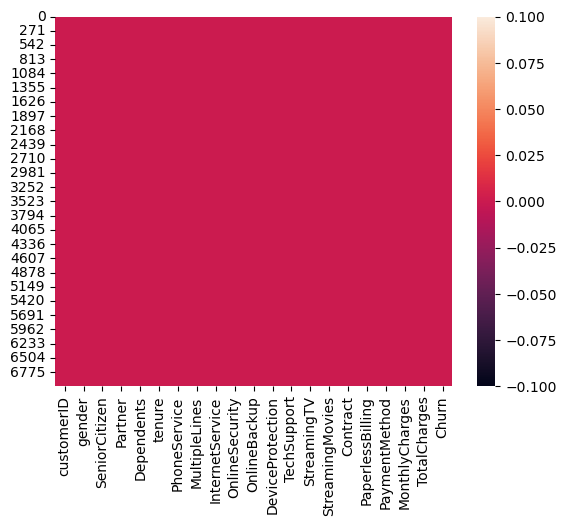

In [8]:
sns.heatmap(df.isnull())

In This Dataset **85.71%** Is Data Object DataType And **14.29%** Is Numerical Data 

Customer Churn "Customer Churn" is a binary concept, meaning customers either churn (leave or stop doing business with a company) or they don't. It is a simple yes or no question – either a customer has churned or they have not

# Data Cleaning

In [9]:
category_col = df.describe(include='O')
category_col

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [10]:
numerical_col = df.describe(exclude='O')
numerical_col

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
for i in category_col:
    print('column name: ',i)
    print('unique values in the category: ',df[i].unique())
    print('number of count in each category: ',df[i].value_counts())
    print('total unique values: ',df[i].nunique())
    print('--'*50)

column name:  customerID
unique values in the category:  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
number of count in each category:  customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
total unique values:  7043
----------------------------------------------------------------------------------------------------
column name:  gender
unique values in the category:  ['Female' 'Male']
number of count in each category:  gender
Male      3555
Female    3488
Name: count, dtype: int64
total unique values:  2
----------------------------------------------------------------------------------------------------
column name:  Partner
unique values in the category:  ['Yes' 'No']
number of count in each category:  Partner
No     3641
Yes    3402
Name: count, dtype: int64
total unique v

In [12]:
df['TotalCharges'].dtypes

dtype('O')

In [13]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [14]:
blank_TotalCharges = df[(df['TotalCharges']==' ')]
blank_TotalCharges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [16]:
# drop missing values
df.dropna(inplace=True)

# drop customerID 
df.drop('customerID', axis=1, inplace=True)

In [17]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

# Exploratory Data Analysis (EDA):

## Gender

In [19]:
#gender count in a dataset
gender_count = df['gender'].value_counts()
gender_count

gender
Male      3549
Female    3483
Name: count, dtype: int64

gender
Male      50.469283
Female    49.530717
Name: proportion, dtype: float64

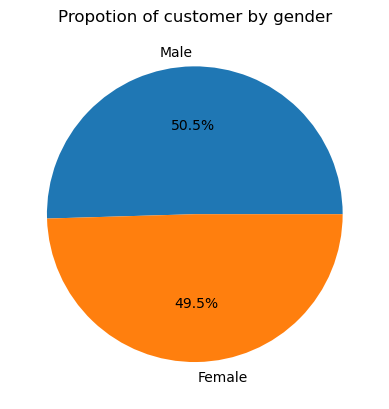

In [20]:
# Count the number of customer for each gender

partner_count = df['gender'].value_counts()
display(df['gender'].value_counts(normalize = True) *100)

# Ploting Pie Chart

plt.pie(partner_count,labels = partner_count.index,autopct = '%1.1f%%')
plt.title('Propotion of customer by gender')
plt.show()

In [21]:
#gender vs churn value
gender_chern=df.groupby('gender')['Churn'].value_counts()
gender_chern

gender  Churn
Female  No       2544
        Yes       939
Male    No       2619
        Yes       930
Name: count, dtype: int64

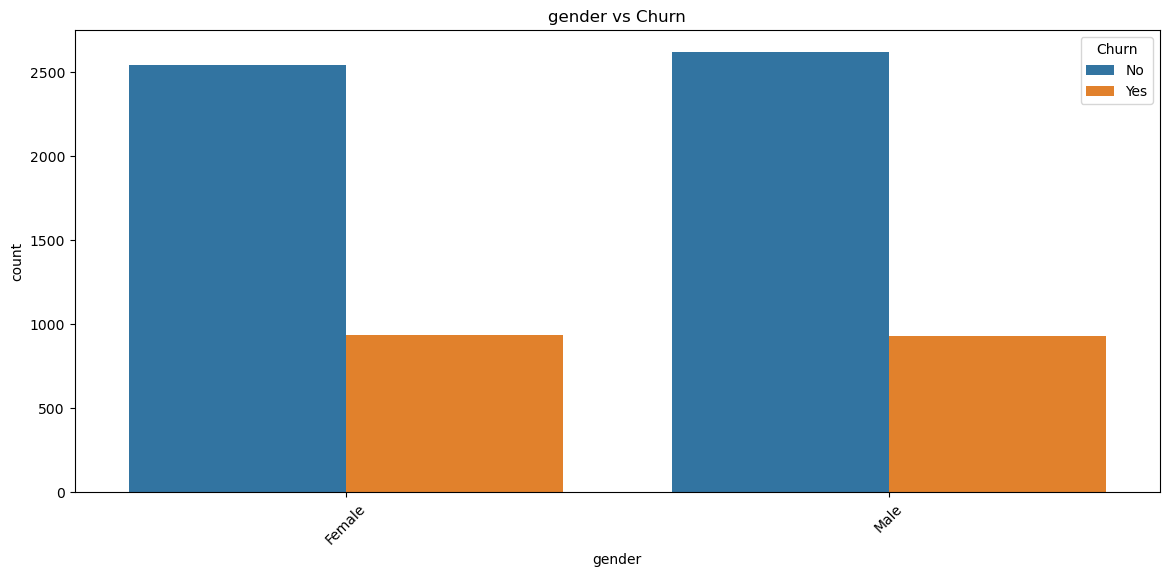

In [22]:
#plotting countplot for gender vs Churn
plt.figure(figsize=(14,6))
sns.countplot(x=df['gender'],hue='Churn',data = df)
plt.title('gender vs Churn')
plt.xticks(rotation = 45) 
plt.show()

In [23]:
#gender vs SeniorCitizen
gender_senior = df.groupby('gender')['SeniorCitizen'].value_counts()
gender_senior

gender  SeniorCitizen
Female  0                2915
        1                 568
Male    0                2975
        1                 574
Name: count, dtype: int64

In [24]:
#gender vs partner
gender_partner = df.groupby('gender')['Partner'].value_counts()
gender_partner

gender  Partner
Female  No         1800
        Yes        1683
Male    No         1839
        Yes        1710
Name: count, dtype: int64

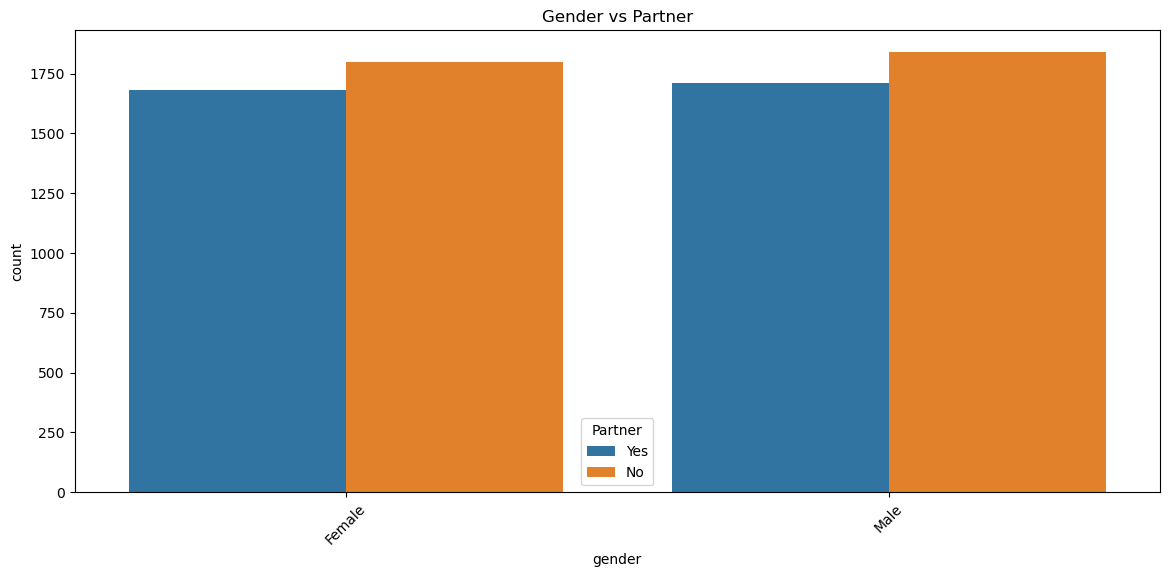

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting countplot for gender vs Partner
plt.figure(figsize=(14, 6))
sns.countplot(x='gender', hue='Partner', data=df)
plt.title('Gender vs Partner')
plt.xticks(rotation=45)
plt.show()

In [26]:
#gender vs Dependents
gender_dep = df.groupby('gender')['Dependents'].value_counts()
gender_dep

gender  Dependents
Female  No            2460
        Yes           1023
Male    No            2473
        Yes           1076
Name: count, dtype: int64

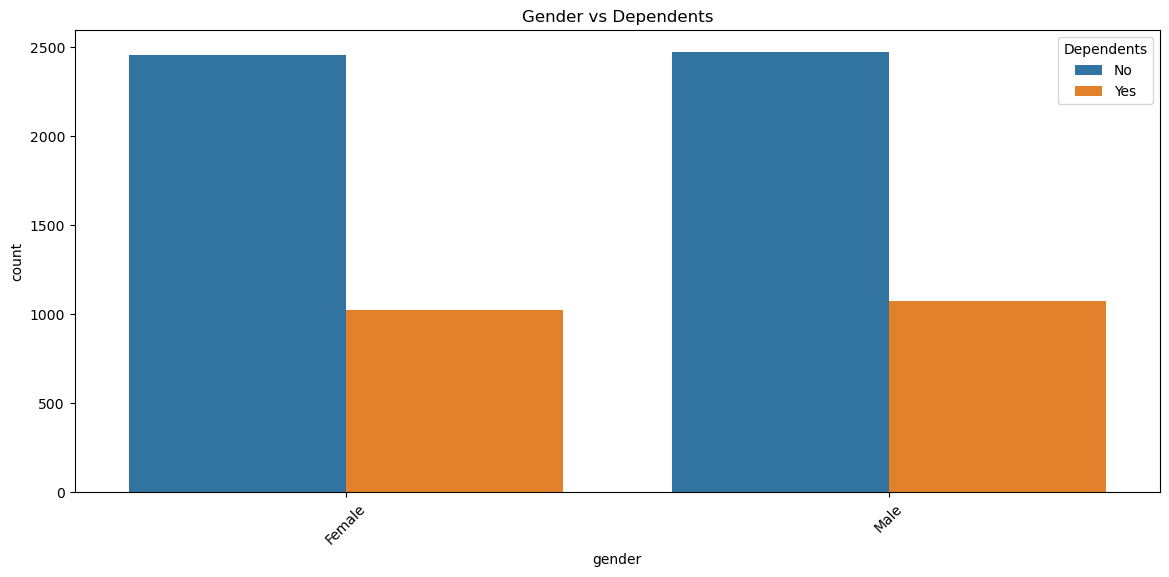

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting countplot for gender vs Dependents
plt.figure(figsize=(14, 6))
sns.countplot(x='gender', hue='Dependents', data=df)
plt.title('Gender vs Dependents')
plt.xticks(rotation=45)
plt.show()

In [28]:
#gender vs tenure
gender_ten = df.groupby('gender')['tenure'].mean()
gender_ten

gender
Female    32.290841
Male      32.550296
Name: tenure, dtype: float64

In [29]:
#gender vs PhoneService
gender_phone = df.groupby('gender')['PhoneService'].value_counts()
gender_phone

gender  PhoneService
Female  Yes             3154
        No               329
Male    Yes             3198
        No               351
Name: count, dtype: int64

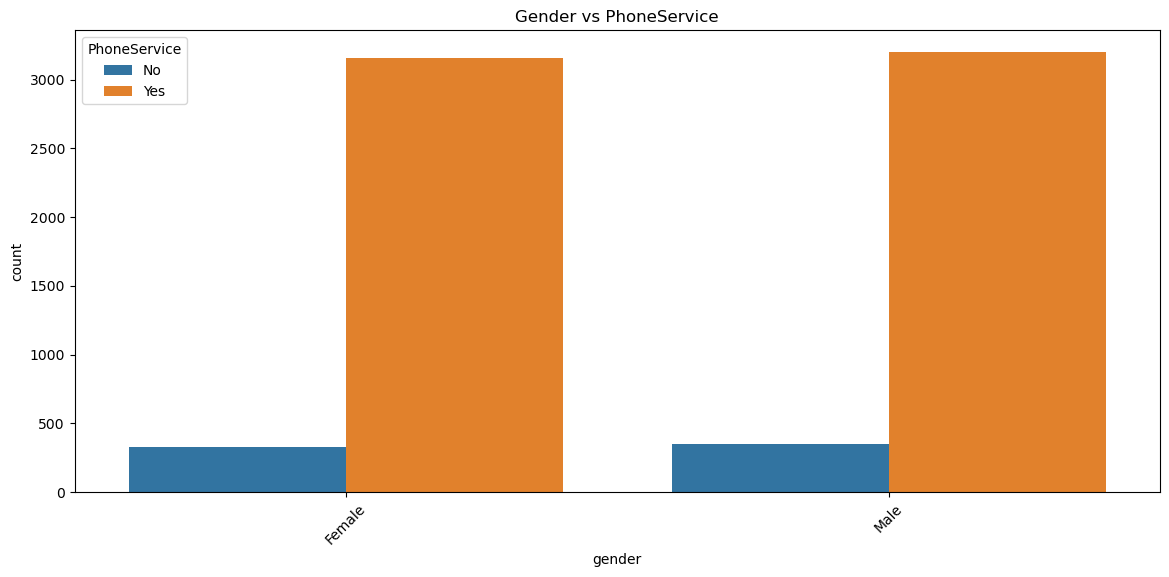

In [30]:
# Plotting countplot for gender vs PhoneService
plt.figure(figsize=(14, 6))
sns.countplot(x='gender', hue='PhoneService', data=df)
plt.title('Gender vs PhoneService')
plt.xticks(rotation=45)
plt.show()

In [31]:
#gender vs MultipleLines
gender_Multi = df.groupby('gender')['MultipleLines'].value_counts()
gender_Multi

gender  MultipleLines   
Female  No                  1669
        Yes                 1485
        No phone service     329
Male    No                  1716
        Yes                 1482
        No phone service     351
Name: count, dtype: int64

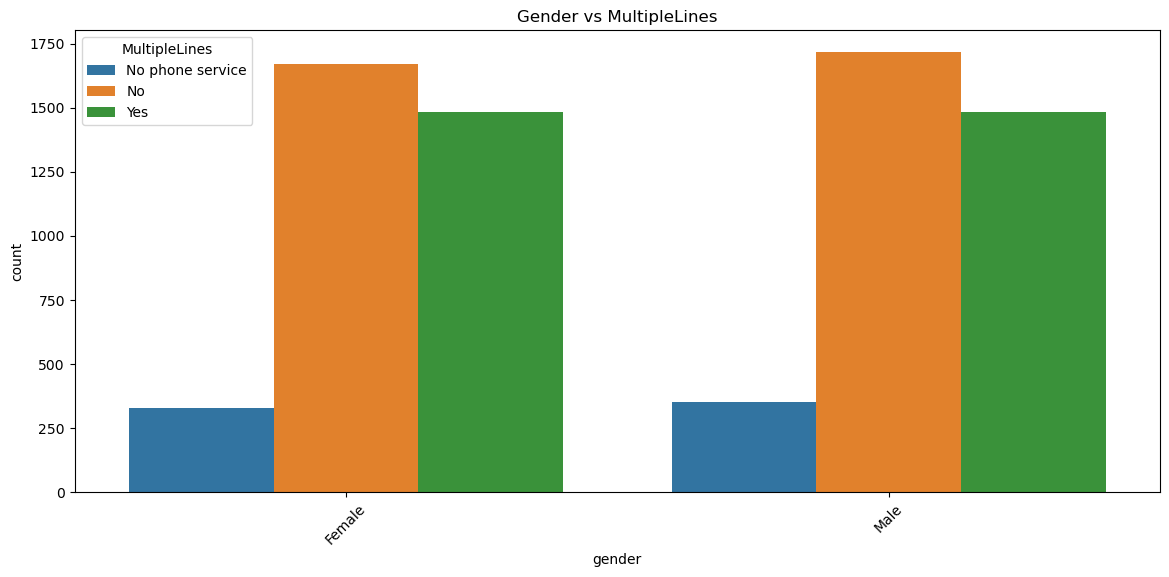

In [32]:
# Plotting countplot for gender vs MultipleLines
plt.figure(figsize=(14, 6))
sns.countplot(x='gender', hue='MultipleLines', data=df)
plt.title('Gender vs MultipleLines')
plt.xticks(rotation=45)
plt.show()

In [33]:
#gender vs InternetService
gender_Inter = df.groupby('gender')['InternetService'].value_counts()
gender_Inter

gender  InternetService
Female  Fiber optic        1553
        DSL                1184
        No                  746
Male    Fiber optic        1543
        DSL                1232
        No                  774
Name: count, dtype: int64

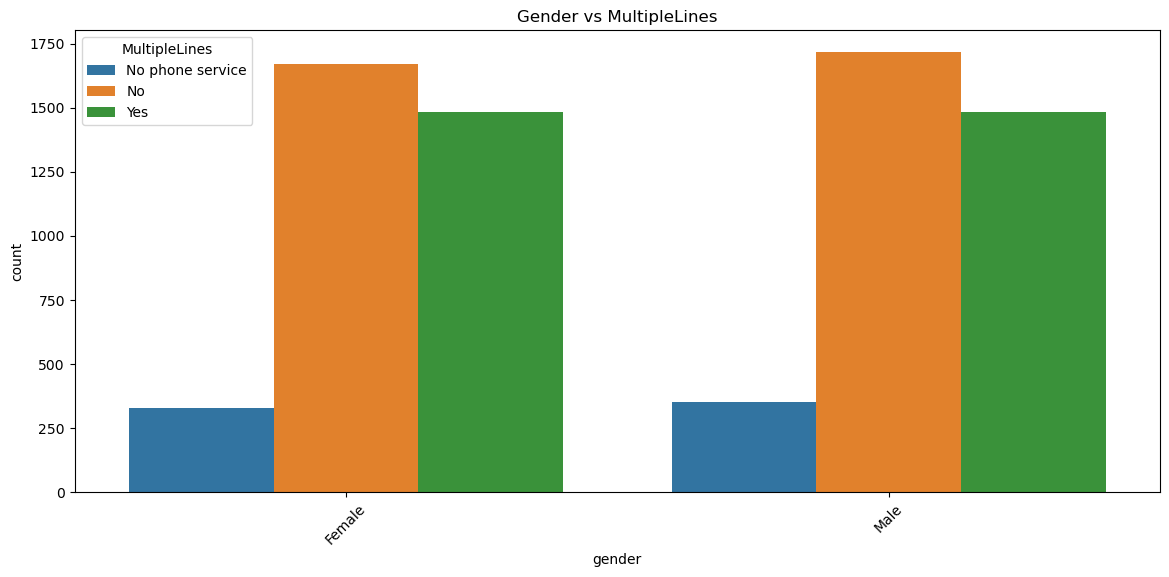

In [34]:
# Plotting countplot for gender vs MultipleLines
plt.figure(figsize=(14, 6))
sns.countplot(x='gender', hue='MultipleLines', data=df)
plt.title('Gender vs MultipleLines')
plt.xticks(rotation=45)
plt.show()

In [35]:
#gender vs OnlineSecurity
gender_Online = df.groupby('gender')['OnlineSecurity'].value_counts()
gender_Online

gender  OnlineSecurity     
Female  No                     1713
        Yes                    1024
        No internet service     746
Male    No                     1784
        Yes                     991
        No internet service     774
Name: count, dtype: int64

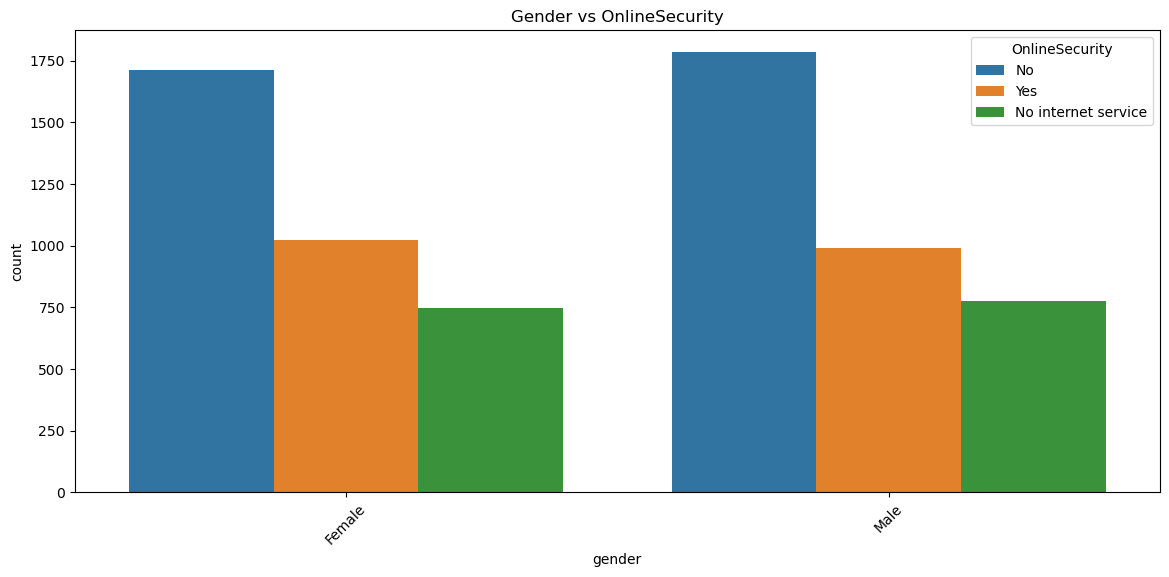

In [36]:
# Plotting countplot for gender vs OnlineSecurity
plt.figure(figsize=(14, 6))
sns.countplot(x='gender', hue='OnlineSecurity', data=df)
plt.title('Gender vs OnlineSecurity')
plt.xticks(rotation=45)
plt.show()

In [37]:
#gender vs DeviceProtection
gender_Dev = df.groupby('gender')['DeviceProtection'].value_counts()
gender_Dev

gender  DeviceProtection   
Female  No                     1538
        Yes                    1199
        No internet service     746
Male    No                     1556
        Yes                    1219
        No internet service     774
Name: count, dtype: int64

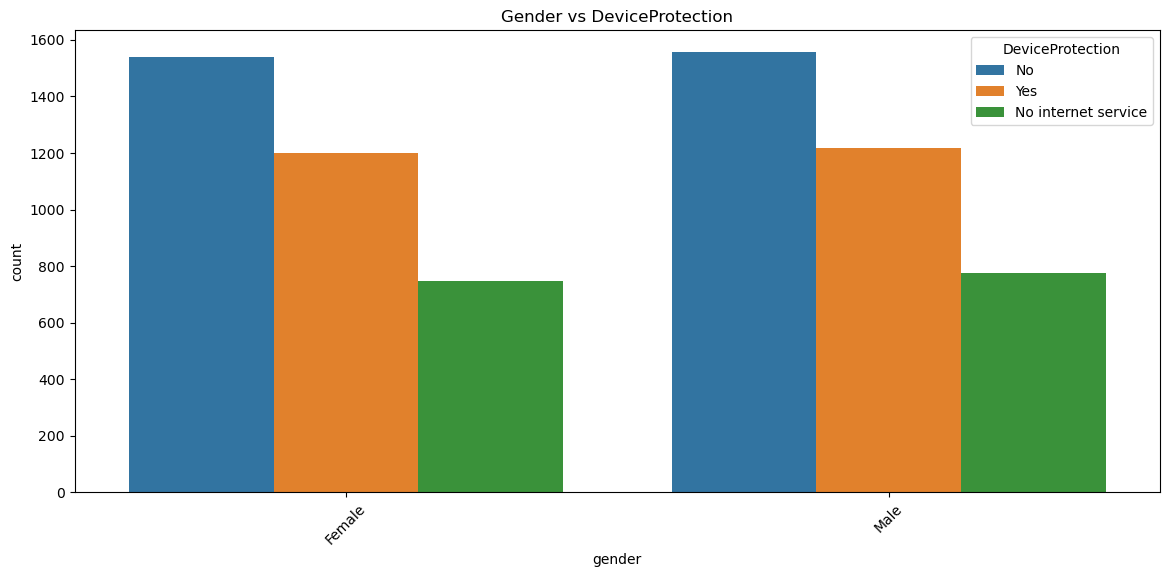

In [38]:
# Plotting countplot for gender vs DeviceProtection
plt.figure(figsize=(14, 6))
sns.countplot(x='gender', hue='DeviceProtection', data=df)
plt.title('Gender vs DeviceProtection')
plt.xticks(rotation=45)
plt.show()

In [39]:
#gender vs TechSupport
gender_tech = df.groupby('gender')['TechSupport'].value_counts()
gender_tech

gender  TechSupport        
Female  No                     1713
        Yes                    1024
        No internet service     746
Male    No                     1759
        Yes                    1016
        No internet service     774
Name: count, dtype: int64

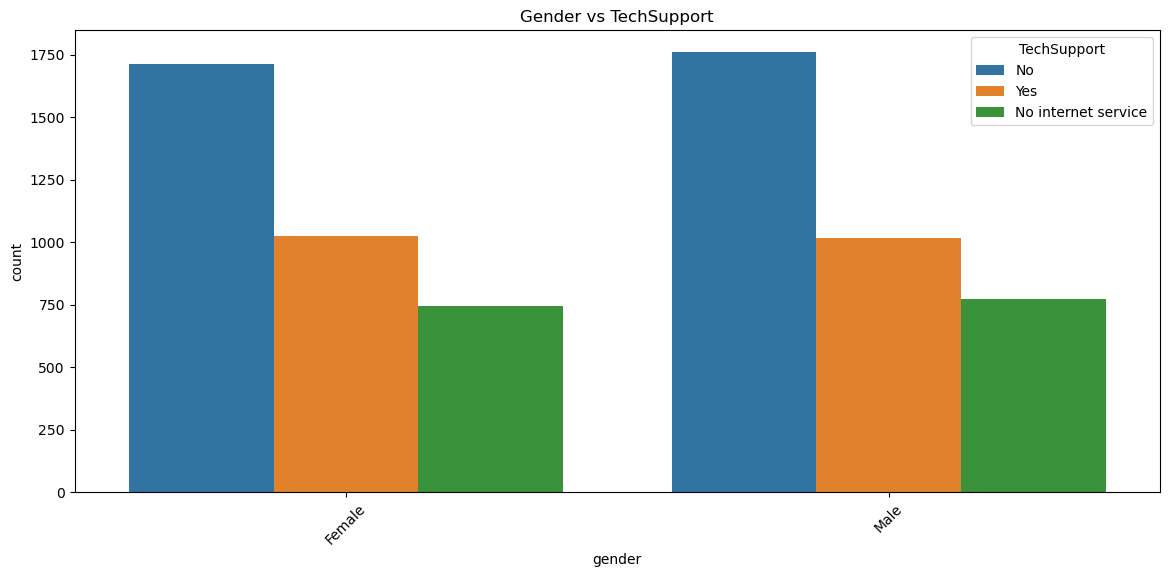

In [40]:
# Plotting countplot for gender vs TechSupport
plt.figure(figsize=(14, 6))
sns.countplot(x='gender', hue='TechSupport', data=df)
plt.title('Gender vs TechSupport')
plt.xticks(rotation=45)
plt.show()

In [41]:
#gender vs StreamingTV
gender_stream = df.groupby('gender')['StreamingTV'].value_counts()
gender_stream

gender  StreamingTV        
Female  No                     1386
        Yes                    1351
        No internet service     746
Male    No                     1423
        Yes                    1352
        No internet service     774
Name: count, dtype: int64

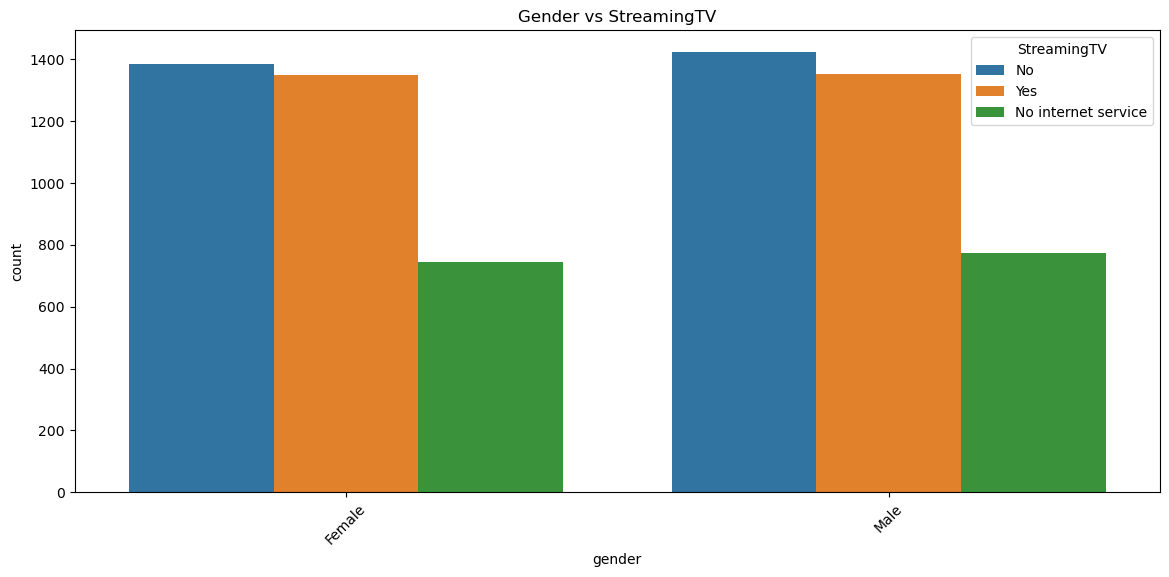

In [42]:
# Plotting countplot for gender vs StreamingTV
plt.figure(figsize=(14, 6))
sns.countplot(x='gender', hue='StreamingTV', data=df)
plt.title('Gender vs StreamingTV')
plt.xticks(rotation=45)
plt.show()

In [43]:
#gender vs StreamingMovies
gender_Str = df.groupby('gender')['StreamingMovies'].value_counts()
gender_Str

gender  StreamingMovies    
Female  Yes                    1370
        No                     1367
        No internet service     746
Male    No                     1414
        Yes                    1361
        No internet service     774
Name: count, dtype: int64

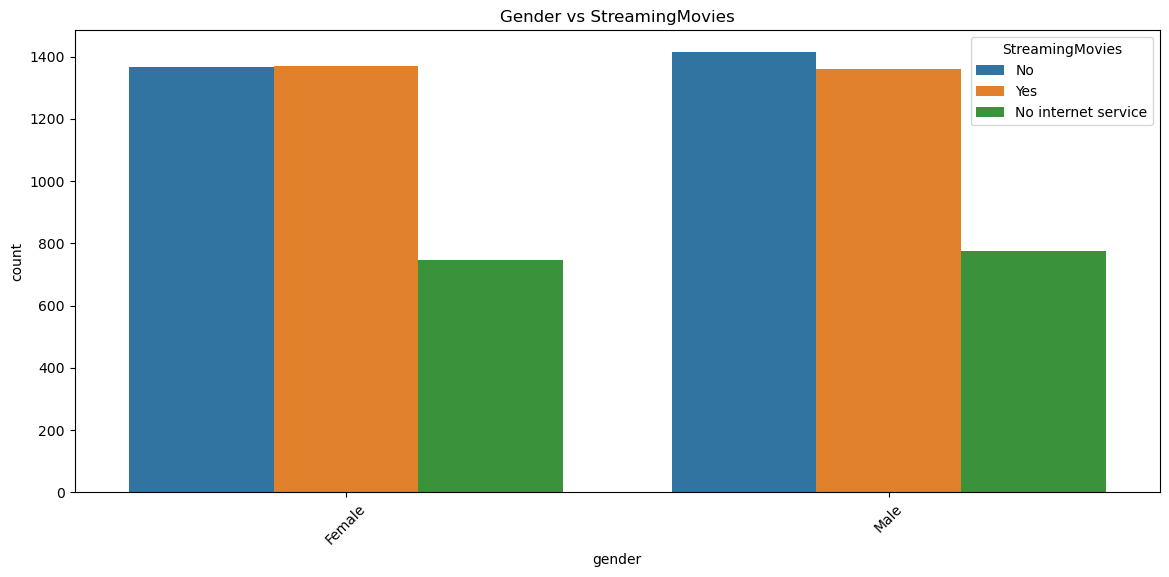

In [44]:
# Plotting countplot for gender vs StreamingMovies
plt.figure(figsize=(14, 6))
sns.countplot(x='gender', hue='StreamingMovies', data=df)
plt.title('Gender vs StreamingMovies')
plt.xticks(rotation=45)
plt.show()

In [45]:
#gender vs Contract
gender_con = df.groupby('gender')['Contract'].value_counts()
gender_con

gender  Contract      
Female  Month-to-month    1925
        Two year           840
        One year           718
Male    Month-to-month    1950
        Two year           845
        One year           754
Name: count, dtype: int64

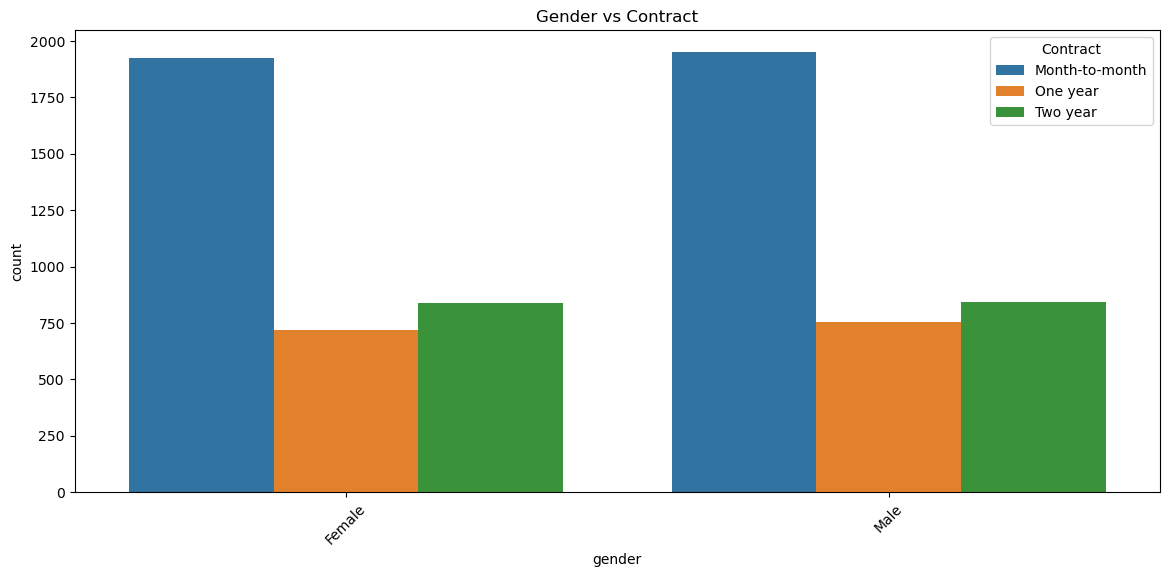

In [46]:
# Plotting countplot for gender vs Contract
plt.figure(figsize=(14, 6))
sns.countplot(x='gender', hue='Contract', data=df)
plt.title('Gender vs Contract')
plt.xticks(rotation=45)
plt.show()

In [47]:
#gender vs PaperlessBilling
gender_Paper = df.groupby('gender')['PaperlessBilling'].value_counts()
gender_Paper

gender  PaperlessBilling
Female  Yes                 2085
        No                  1398
Male    Yes                 2083
        No                  1466
Name: count, dtype: int64

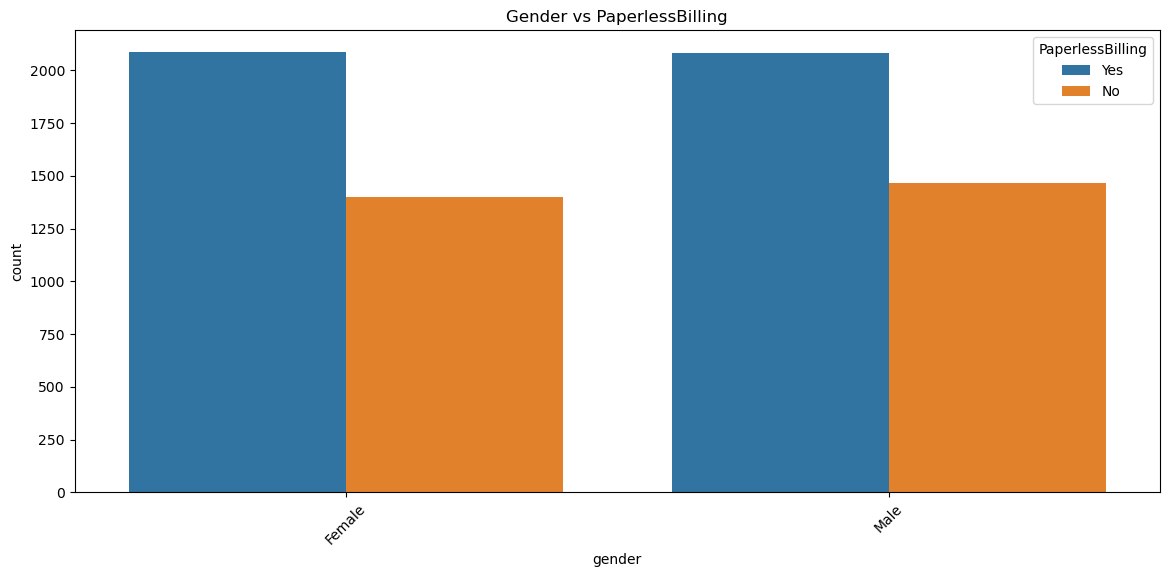

In [48]:
# Plotting countplot for gender vs PaperlessBilling
plt.figure(figsize=(14, 6))
sns.countplot(x='gender', hue='PaperlessBilling', data=df)
plt.title('Gender vs PaperlessBilling')
plt.xticks(rotation=45)
plt.show()

In [49]:
#gender vs PaymentMethod
gender_pay = df.groupby('gender')['PaymentMethod'].value_counts()
gender_pay

gender  PaymentMethod            
Female  Electronic check             1170
        Bank transfer (automatic)     787
        Mailed check                  775
        Credit card (automatic)       751
Male    Electronic check             1195
        Mailed check                  829
        Credit card (automatic)       770
        Bank transfer (automatic)     755
Name: count, dtype: int64

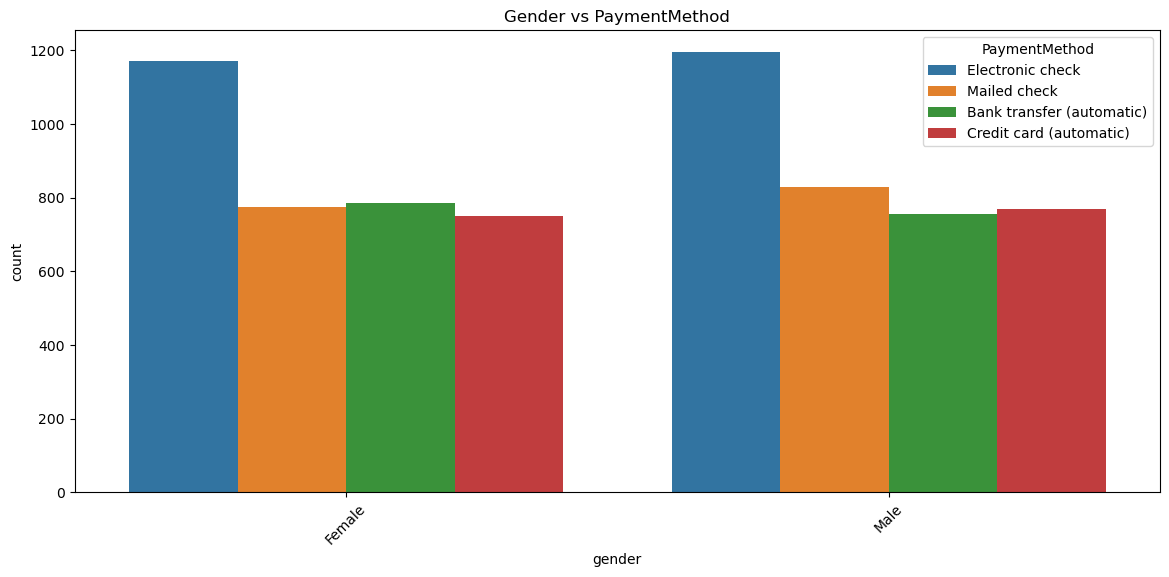

In [50]:
# Plotting countplot for gender vs PaymentMethod
plt.figure(figsize=(14, 6))
sns.countplot(x='gender', hue='PaymentMethod', data=df)
plt.title('Gender vs PaymentMethod')
plt.xticks(rotation=45)
plt.show()

In [51]:
#gender vs MonthlyCharges
gender_mon = df.groupby('gender')['MonthlyCharges'].mean()
gender_mon

gender
Female    65.216652
Male      64.387546
Name: MonthlyCharges, dtype: float64

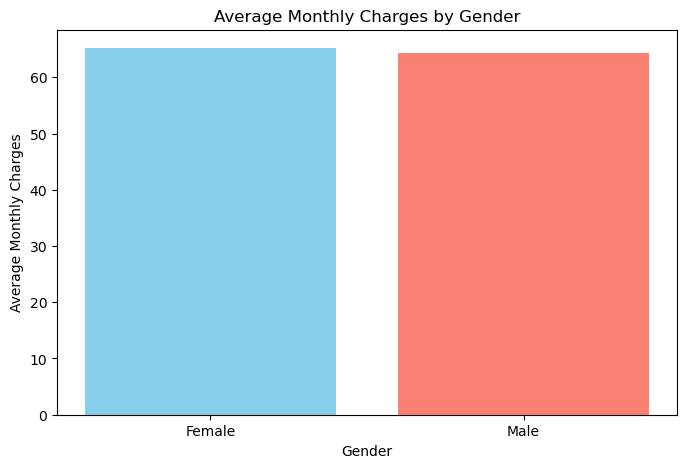

In [52]:
plt.figure(figsize=(8, 5))
plt.bar(gender_mon.index, gender_mon.values, color=['skyblue', 'salmon'])
plt.xlabel('Gender')
plt.ylabel('Average Monthly Charges')
plt.title('Average Monthly Charges by Gender')
plt.show()

In [53]:
# Convert TotalCharges to numeric, setting errors='coerce' to replace invalid values with NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [54]:
#gender vs Totalcharges
gender_charges = df.groupby('gender')['TotalCharges'].mean()
gender_charges

gender
Female    2283.190985
Male      2283.407861
Name: TotalCharges, dtype: float64

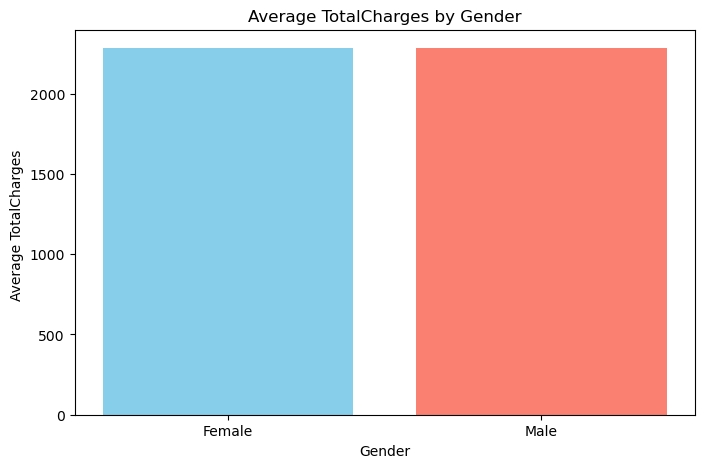

In [55]:
plt.figure(figsize=(8, 5))
plt.bar(gender_charges.index, gender_charges.values, color=['skyblue', 'salmon'])
plt.xlabel('Gender')
plt.ylabel('Average TotalCharges ')
plt.title('Average TotalCharges by Gender')
plt.show()

# SeniorCitizen

SeniorCitizen
0    83.759954
1    16.240046
Name: proportion, dtype: float64

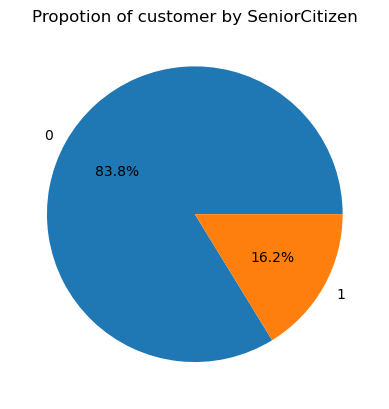

In [56]:
# Count the number of customer for each gender

partner_count = df['SeniorCitizen'].value_counts()
display(df['SeniorCitizen'].value_counts(normalize = True) *100)

# Ploting Pie Chart

plt.pie(partner_count,labels = partner_count.index,autopct = '%1.1f%%')
plt.title('Propotion of customer by SeniorCitizen')
plt.show()

In [57]:
senior_Par = df.groupby('SeniorCitizen')['Partner'].value_counts()
senior_Par

SeniorCitizen  Partner
0              No         3070
               Yes        2820
1              Yes         573
               No          569
Name: count, dtype: int64

In [58]:
senior_Dep = df.groupby('SeniorCitizen')['Dependents'].value_counts()
senior_Dep

SeniorCitizen  Dependents
0              No            3882
               Yes           2008
1              No            1051
               Yes             91
Name: count, dtype: int64

In [59]:
senior_ten = df.groupby('SeniorCitizen')['tenure'].mean()
senior_ten

SeniorCitizen
0    32.252292
1    33.295972
Name: tenure, dtype: float64

In [60]:
senior_Phone = df.groupby('SeniorCitizen')['PhoneService'].value_counts()
senior_Phone

SeniorCitizen  PhoneService
0              Yes             5314
               No               576
1              Yes             1038
               No               104
Name: count, dtype: int64

In [61]:
senior_Mult = df.groupby('SeniorCitizen')['MultipleLines'].value_counts()
senior_Mult

SeniorCitizen  MultipleLines   
0              No                  3012
               Yes                 2302
               No phone service     576
1              Yes                  665
               No                   373
               No phone service     104
Name: count, dtype: int64

In [62]:
senior_Internet = df.groupby('SeniorCitizen')['InternetService'].value_counts()
senior_Internet

SeniorCitizen  InternetService
0              Fiber optic        2265
               DSL                2157
               No                 1468
1              Fiber optic         831
               DSL                 259
               No                   52
Name: count, dtype: int64

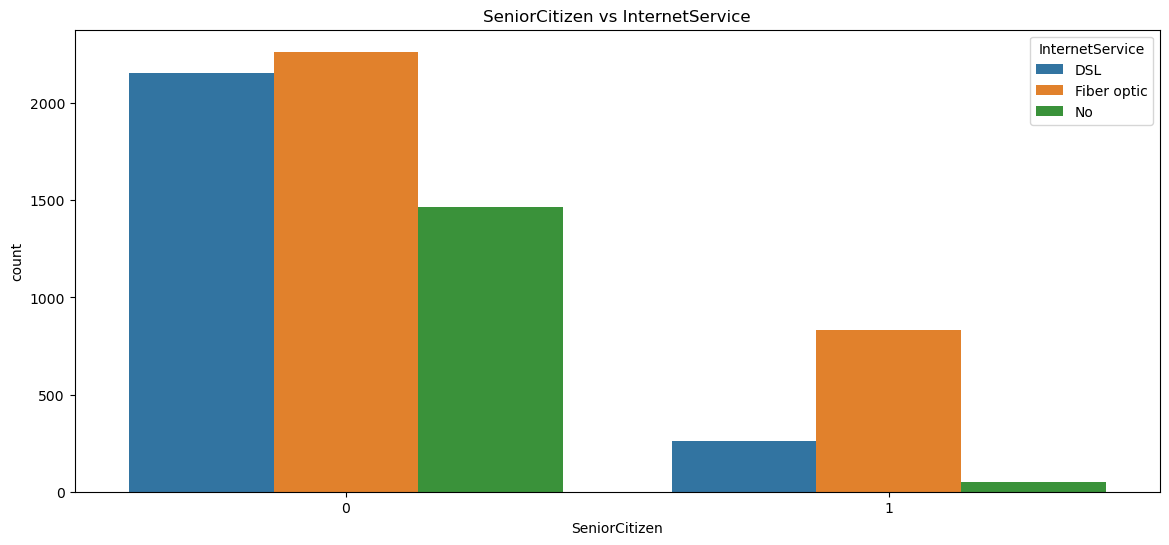

In [63]:
#plotting countplot for SeniorCitizen vs InternetService
plt.figure(figsize=(14,6))
sns.countplot(x=df['SeniorCitizen'],hue='InternetService',data = df)
plt.title('SeniorCitizen vs InternetService')
plt.xticks(rotation = 0) 
plt.show()

In [64]:
senior_Online = df.groupby('SeniorCitizen')['OnlineSecurity'].value_counts()
senior_Online

SeniorCitizen  OnlineSecurity     
0              No                     2689
               Yes                    1733
               No internet service    1468
1              No                      808
               Yes                     282
               No internet service      52
Name: count, dtype: int64

In [65]:
senior_Backup = df.groupby('SeniorCitizen')['OnlineBackup'].value_counts()
senior_Backup

SeniorCitizen  OnlineBackup       
0              No                     2473
               Yes                    1949
               No internet service    1468
1              No                      614
               Yes                     476
               No internet service      52
Name: count, dtype: int64

In [66]:
senior_Device = df.groupby('SeniorCitizen')['DeviceProtection'].value_counts()
senior_Device

SeniorCitizen  DeviceProtection   
0              No                     2470
               Yes                    1952
               No internet service    1468
1              No                      624
               Yes                     466
               No internet service      52
Name: count, dtype: int64

In [67]:
senior_Tech = df.groupby('SeniorCitizen')['TechSupport'].value_counts()
senior_Tech

SeniorCitizen  TechSupport        
0              No                     2642
               Yes                    1780
               No internet service    1468
1              No                      830
               Yes                     260
               No internet service      52
Name: count, dtype: int64

In [68]:
senior_StreamingTv = df.groupby('SeniorCitizen')['StreamingTV'].value_counts()
senior_StreamingTv

SeniorCitizen  StreamingTV        
0              No                     2291
               Yes                    2131
               No internet service    1468
1              Yes                     572
               No                      518
               No internet service      52
Name: count, dtype: int64

In [69]:
senior_StreamingMovies = df.groupby('SeniorCitizen')['StreamingMovies'].value_counts()
senior_StreamingMovies

SeniorCitizen  StreamingMovies    
0              No                     2286
               Yes                    2136
               No internet service    1468
1              Yes                     595
               No                      495
               No internet service      52
Name: count, dtype: int64

In [70]:
senior_Contract = df.groupby('SeniorCitizen')['Contract'].value_counts()
senior_Contract

SeniorCitizen  Contract      
0              Month-to-month    3068
               Two year          1540
               One year          1282
1              Month-to-month     807
               One year           190
               Two year           145
Name: count, dtype: int64

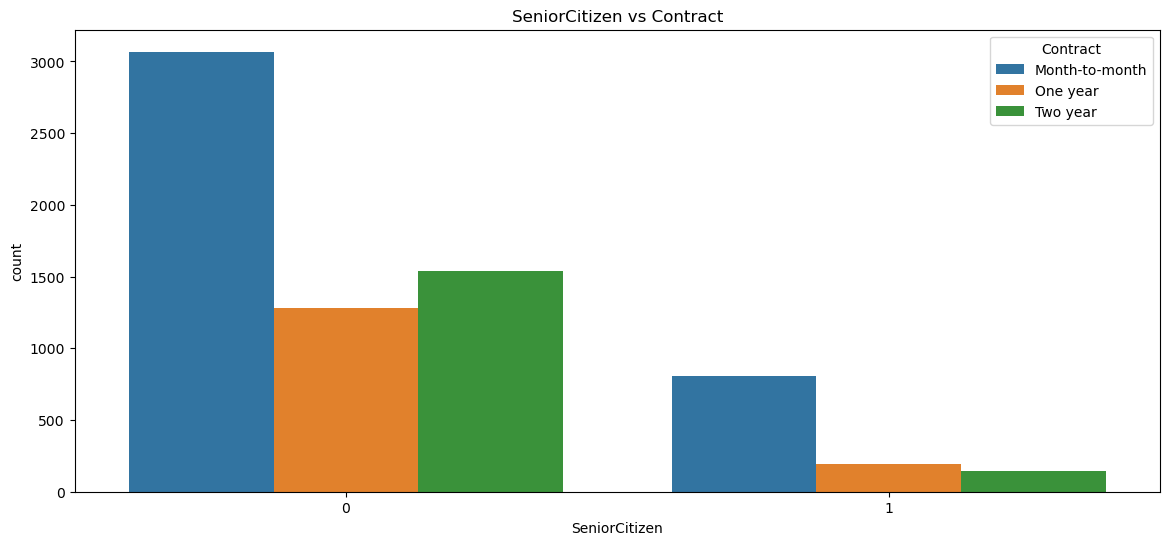

In [71]:
#plotting countplot for SeniorCitizen vs Contract
plt.figure(figsize=(14,6))
sns.countplot(x=df['SeniorCitizen'],hue='Contract',data = df)
plt.title('SeniorCitizen vs Contract')
plt.xticks(rotation = 0) 
plt.show()

In [72]:
senior_Paperless = df.groupby('SeniorCitizen')['PaperlessBilling'].value_counts()
senior_Paperless

SeniorCitizen  PaperlessBilling
0              Yes                 3292
               No                  2598
1              Yes                  876
               No                   266
Name: count, dtype: int64

In [73]:
senior_PaymentMethod = df.groupby('SeniorCitizen')['PaymentMethod'].value_counts()
senior_PaymentMethod

SeniorCitizen  PaymentMethod            
0              Electronic check             1771
               Mailed check                 1510
               Bank transfer (automatic)    1309
               Credit card (automatic)      1300
1              Electronic check              594
               Bank transfer (automatic)     233
               Credit card (automatic)       221
               Mailed check                   94
Name: count, dtype: int64

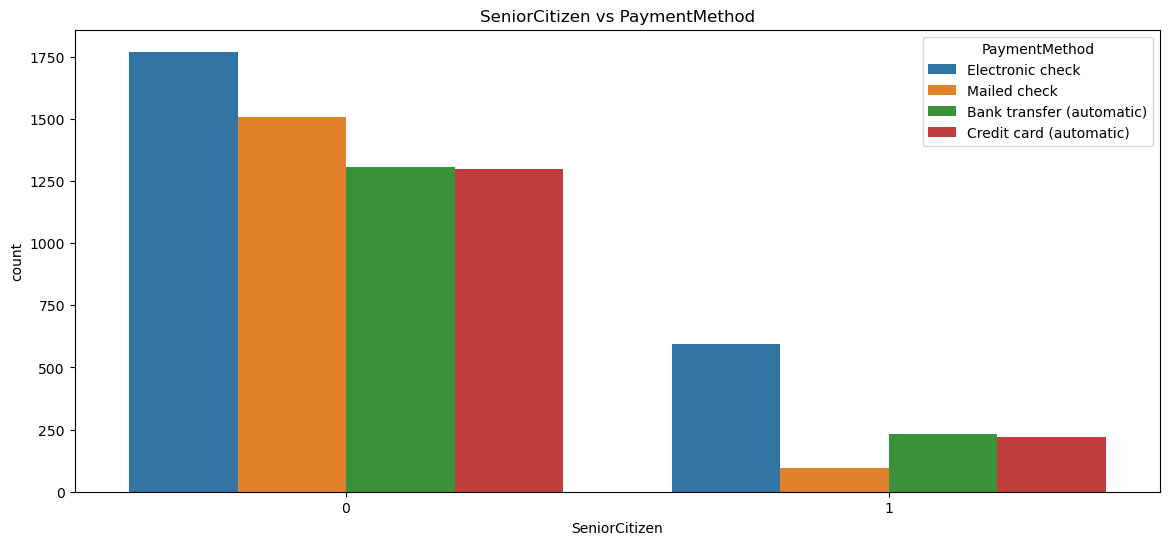

In [74]:
#plotting countplot for SeniorCitizen vs PaymentMethod
plt.figure(figsize=(14,6))
sns.countplot(x=df['SeniorCitizen'],hue='PaymentMethod',data = df)
plt.title('SeniorCitizen vs PaymentMethod')
plt.xticks(rotation = 0) 
plt.show()

In [75]:
senior_MonthlyCharges = df.groupby('SeniorCitizen')['MonthlyCharges'].mean()
senior_MonthlyCharges

SeniorCitizen
0    61.885594
1    79.820359
Name: MonthlyCharges, dtype: float64

In [76]:
senior_TotalCharges = df.groupby('SeniorCitizen')['TotalCharges'].mean()
senior_TotalCharges

SeniorCitizen
0    2181.089550
1    2810.465193
Name: TotalCharges, dtype: float64

In [77]:
senior_Churn = df.groupby('SeniorCitizen')['Churn'].value_counts()
senior_Churn

SeniorCitizen  Churn
0              No       4497
               Yes      1393
1              No        666
               Yes       476
Name: count, dtype: int64

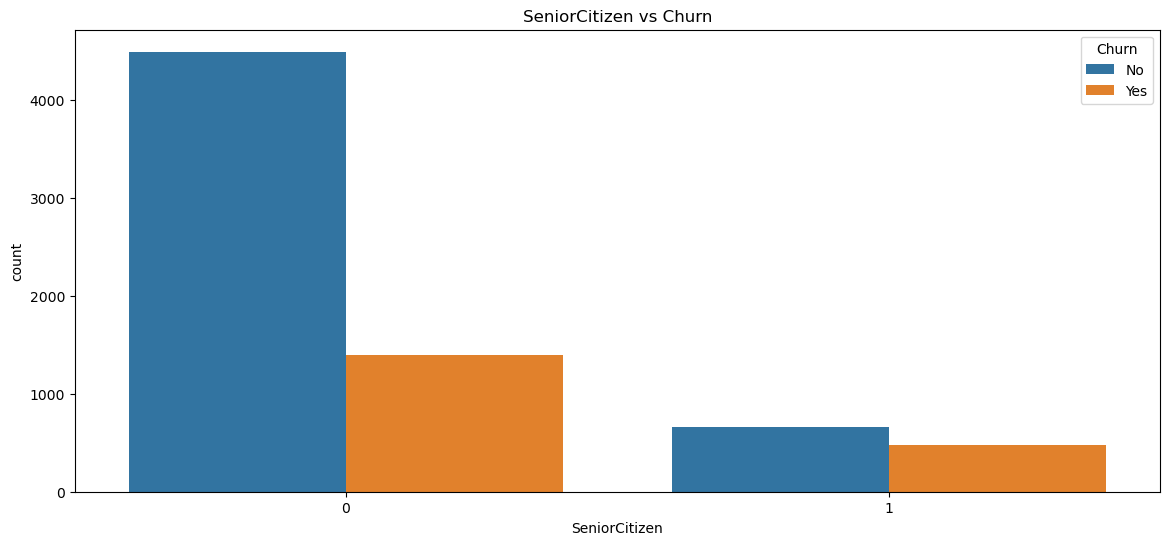

In [78]:
#plotting countplot for SeniorCitizen vs Churn
plt.figure(figsize=(14,6))
sns.countplot(x=df['SeniorCitizen'],hue='Churn',data = df)
plt.title('SeniorCitizen vs Churn')
plt.xticks(rotation = 0) 
plt.show()

# Partner

In [79]:
partner_count=df['Partner'].value_counts()
partner_count

Partner
No     3639
Yes    3393
Name: count, dtype: int64

Partner
No     51.749147
Yes    48.250853
Name: proportion, dtype: float64

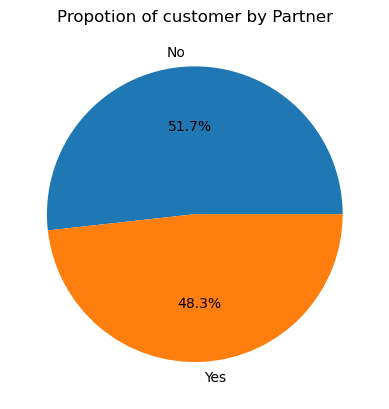

In [80]:
# Count the number of customer for each gender

partner_count = df['Partner'].value_counts()
display(df['Partner'].value_counts(normalize = True) *100)

# Ploting Pie Chart

plt.pie(partner_count,labels = partner_count.index,autopct = '%1.1f%%')
plt.title('Propotion of customer by Partner')
plt.show()

In [81]:
partner_dep = df.groupby('Partner')['Dependents'].value_counts()
partner_dep

Partner  Dependents
No       No            3280
         Yes            359
Yes      Yes           1740
         No            1653
Name: count, dtype: int64

In [82]:
partner_tenure = df.groupby('Partner')['tenure'].mean()
partner_tenure

Partner
No     23.370706
Yes    42.129089
Name: tenure, dtype: float64

In [83]:
partner_PhoneService = df.groupby('Partner')['PhoneService'].value_counts()
partner_PhoneService

Partner  PhoneService
No       Yes             3268
         No               371
Yes      Yes             3084
         No               309
Name: count, dtype: int64

In [84]:
partner_MultipleLines = df.groupby('Partner')['MultipleLines'].value_counts()
partner_MultipleLines

Partner  MultipleLines   
No       No                  1980
         Yes                 1288
         No phone service     371
Yes      Yes                 1679
         No                  1405
         No phone service     309
Name: count, dtype: int64

In [85]:
partner_InternetService = df.groupby('Partner')['InternetService'].value_counts()
partner_InternetService

Partner  InternetService
No       Fiber optic        1600
         DSL                1252
         No                  787
Yes      Fiber optic        1496
         DSL                1164
         No                  733
Name: count, dtype: int64

In [86]:
partner_OnlineSecurity = df.groupby('Partner')['OnlineSecurity'].value_counts()
partner_OnlineSecurity

Partner  OnlineSecurity     
No       No                     2037
         Yes                     815
         No internet service     787
Yes      No                     1460
         Yes                    1200
         No internet service     733
Name: count, dtype: int64

In [87]:
partner_OnlineBackup = df.groupby('Partner')['OnlineBackup'].value_counts()
partner_OnlineBackup

Partner  OnlineBackup       
No       No                     1834
         Yes                    1018
         No internet service     787
Yes      Yes                    1407
         No                     1253
         No internet service     733
Name: count, dtype: int64

In [88]:
partner_DeviceProtection = df.groupby('Partner')['DeviceProtection'].value_counts()
partner_DeviceProtection

Partner  DeviceProtection   
No       No                     1857
         Yes                     995
         No internet service     787
Yes      Yes                    1423
         No                     1237
         No internet service     733
Name: count, dtype: int64

In [89]:
partner_TechSupport = df.groupby('Partner')['TechSupport'].value_counts()
partner_TechSupport

Partner  TechSupport        
No       No                     1988
         Yes                     864
         No internet service     787
Yes      No                     1484
         Yes                    1176
         No internet service     733
Name: count, dtype: int64

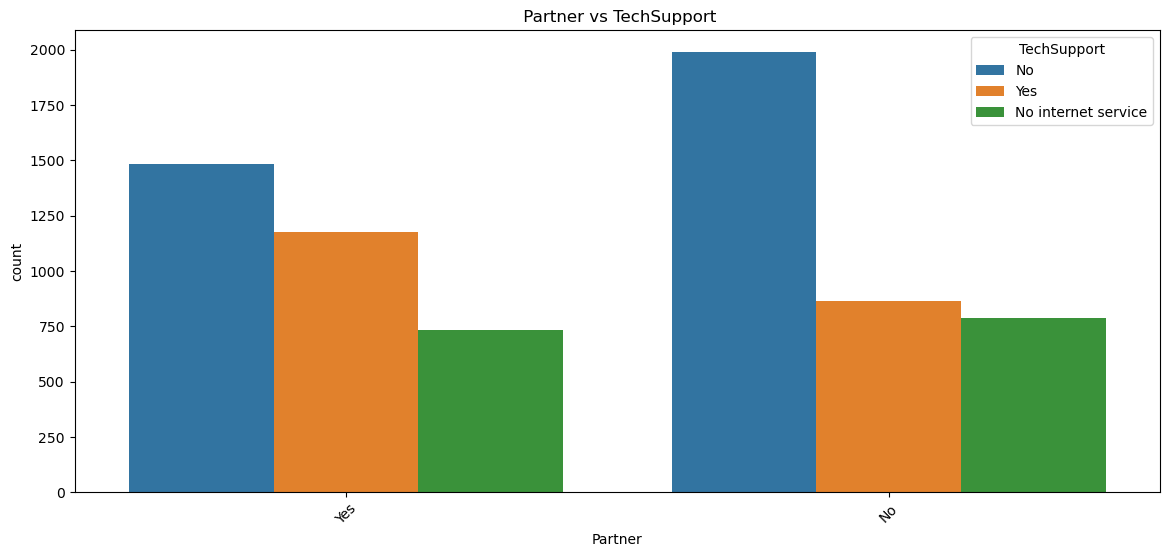

In [90]:
#plotting countplot for Dependents vs TechSupport
plt.figure(figsize=(14,6))
sns.countplot(x=df['Partner'],hue='TechSupport',data = df)
plt.title(' Partner vs TechSupport')
plt.xticks(rotation = 45) 
plt.show()

In [91]:
partner_StreamingTV = df.groupby('Partner')['StreamingTV'].value_counts()
partner_StreamingTV

Partner  StreamingTV        
No       No                     1666
         Yes                    1186
         No internet service     787
Yes      Yes                    1517
         No                     1143
         No internet service     733
Name: count, dtype: int64

In [92]:
partner_StreamingMovies = df.groupby('Partner')['StreamingMovies'].value_counts()
partner_StreamingMovies

Partner  StreamingMovies    
No       No                     1641
         Yes                    1211
         No internet service     787
Yes      Yes                    1520
         No                     1140
         No internet service     733
Name: count, dtype: int64

In [93]:
partner_Contract = df.groupby('Partner')['Contract'].value_counts()
partner_Contract

Partner  Contract      
No       Month-to-month    2495
         One year           643
         Two year           501
Yes      Month-to-month    1380
         Two year          1184
         One year           829
Name: count, dtype: int64

In [94]:
partner_PaperlessBilling = df.groupby('Partner')['PaperlessBilling'].value_counts()
partner_PaperlessBilling

Partner  PaperlessBilling
No       Yes                 2181
         No                  1458
Yes      Yes                 1987
         No                  1406
Name: count, dtype: int64

In [95]:
partner_PaymentMethod = df.groupby('Partner')['PaymentMethod'].value_counts()
partner_PaymentMethod

Partner  PaymentMethod            
No       Electronic check             1362
         Mailed check                  973
         Credit card (automatic)       668
         Bank transfer (automatic)     636
Yes      Electronic check             1003
         Bank transfer (automatic)     906
         Credit card (automatic)       853
         Mailed check                  631
Name: count, dtype: int64

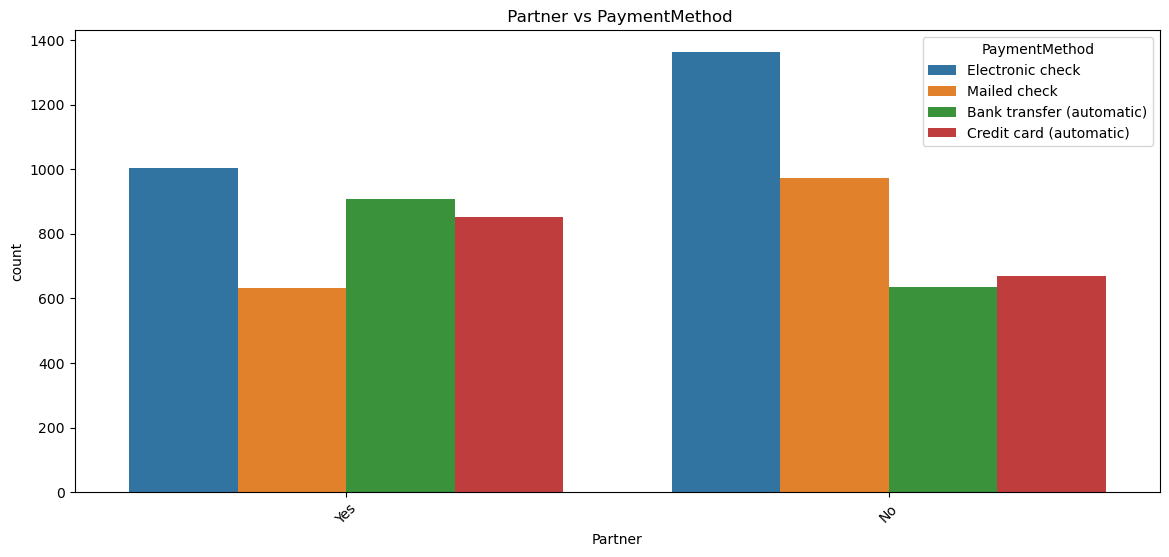

In [96]:
#plotting countplot for Dependents vs PaymentMethod
plt.figure(figsize=(14,6))
sns.countplot(x=df['Partner'],hue='PaymentMethod',data = df)
plt.title(' Partner vs PaymentMethod')
plt.xticks(rotation = 45) 
plt.show()

In [97]:
partner_MonthlyCharges = df.groupby('Partner')['MonthlyCharges'].mean()
partner_MonthlyCharges

Partner
No     61.956472
Yes    67.845977
Name: MonthlyCharges, dtype: float64

In [98]:
partner_TotalCharges = df.groupby('Partner')['TotalCharges'].mean()
partner_TotalCharges

Partner
No     1584.960429
Yes    3032.271648
Name: TotalCharges, dtype: float64

In [99]:
partner_Churn = df.groupby('Partner')['Churn'].value_counts()
partner_Churn

Partner  Churn
No       No       2439
         Yes      1200
Yes      No       2724
         Yes       669
Name: count, dtype: int64

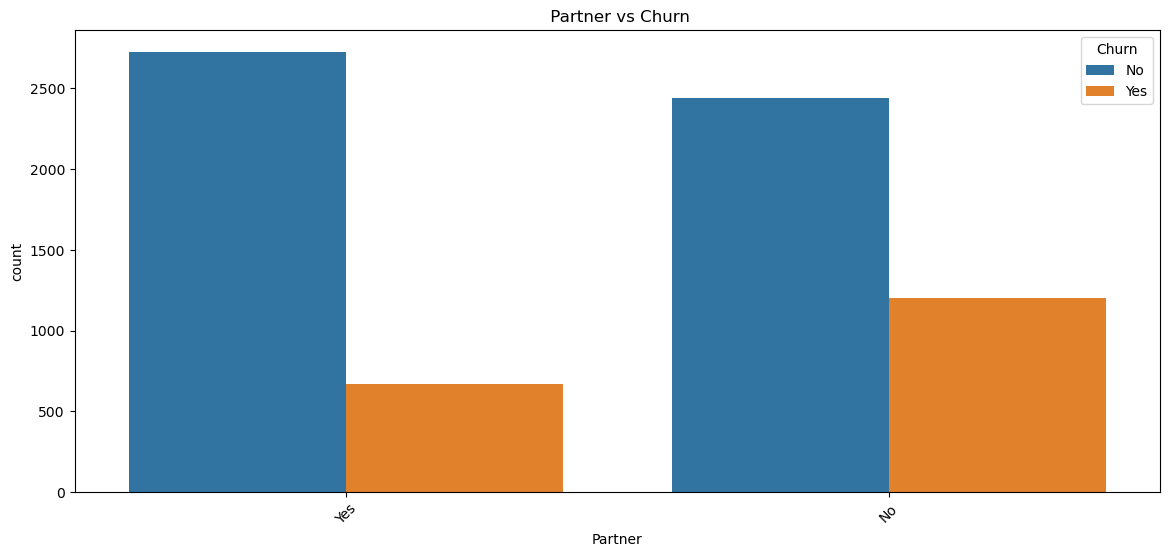

In [100]:
#plotting countplot for Dependents vs Churn
plt.figure(figsize=(14,6))
sns.countplot(x=df['Partner'],hue='Churn',data = df)
plt.title(' Partner vs Churn')
plt.xticks(rotation = 45) 
plt.show()

# Dependents

In [101]:
df.Dependents.info()

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7042
Series name: Dependents
Non-Null Count  Dtype 
--------------  ----- 
7032 non-null   object
dtypes: object(1)
memory usage: 109.9+ KB


In [102]:
dependent_count = df['Dependents'].value_counts()
dependent_count

Dependents
No     4933
Yes    2099
Name: count, dtype: int64

Dependents
No     70.150739
Yes    29.849261
Name: proportion, dtype: float64

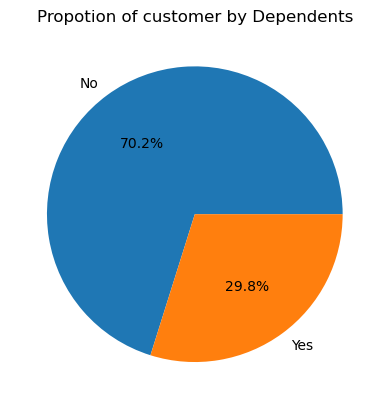

In [103]:
# Count the number of customer for each gender

partner_count = df['Dependents'].value_counts()
display(df['Dependents'].value_counts(normalize = True) *100)

# Ploting Pie Chart

plt.pie(partner_count,labels = partner_count.index,autopct = '%1.1f%%')
plt.title('Propotion of customer by Dependents')
plt.show()

In [104]:
dependent_PhoneService = df.groupby('Dependents')['PhoneService'].value_counts()
dependent_PhoneService

Dependents  PhoneService
No          Yes             4457
            No               476
Yes         Yes             1895
            No               204
Name: count, dtype: int64

In [105]:
dependent_MultipleLines = df.groupby('Dependents')['MultipleLines'].value_counts()
dependent_MultipleLines

Dependents  MultipleLines   
No          No                  2337
            Yes                 2120
            No phone service     476
Yes         No                  1048
            Yes                  847
            No phone service     204
Name: count, dtype: int64

In [106]:
dependent_InternetService = df.groupby('Dependents')['InternetService'].value_counts()
dependent_InternetService

Dependents  InternetService
No          Fiber optic        2434
            DSL                1616
            No                  883
Yes         DSL                 800
            Fiber optic         662
            No                  637
Name: count, dtype: int64

In [107]:
dependent_OnlineSecurity = df.groupby('Dependents')['OnlineSecurity'].value_counts()
dependent_OnlineSecurity

Dependents  OnlineSecurity     
No          No                     2754
            Yes                    1296
            No internet service     883
Yes         No                      743
            Yes                     719
            No internet service     637
Name: count, dtype: int64

In [108]:
dependent_OnlineBackup = df.groupby('Dependents')['OnlineBackup'].value_counts()
dependent_OnlineBackup

Dependents  OnlineBackup       
No          No                     2385
            Yes                    1665
            No internet service     883
Yes         Yes                     760
            No                      702
            No internet service     637
Name: count, dtype: int64

In [109]:
dependent_DeviceProtection = df.groupby('Dependents')['DeviceProtection'].value_counts()
dependent_DeviceProtection

Dependents  DeviceProtection   
No          No                     2375
            Yes                    1675
            No internet service     883
Yes         Yes                     743
            No                      719
            No internet service     637
Name: count, dtype: int64

In [110]:
dependent_TechSupport = df.groupby('Dependents')['TechSupport'].value_counts()
dependent_TechSupport

Dependents  TechSupport        
No          No                     2711
            Yes                    1339
            No internet service     883
Yes         No                      761
            Yes                     701
            No internet service     637
Name: count, dtype: int64

In [111]:
dependent_StreamingTV = df.groupby('Dependents')['StreamingTV'].value_counts()
dependent_StreamingTV

Dependents  StreamingTV        
No          No                     2128
            Yes                    1922
            No internet service     883
Yes         Yes                     781
            No                      681
            No internet service     637
Name: count, dtype: int64

In [112]:
dependent_StreamingMovies = df.groupby('Dependents')['StreamingMovies'].value_counts()
dependent_StreamingMovies

Dependents  StreamingMovies    
No          No                     2074
            Yes                    1976
            No internet service     883
Yes         Yes                     755
            No                      707
            No internet service     637
Name: count, dtype: int64

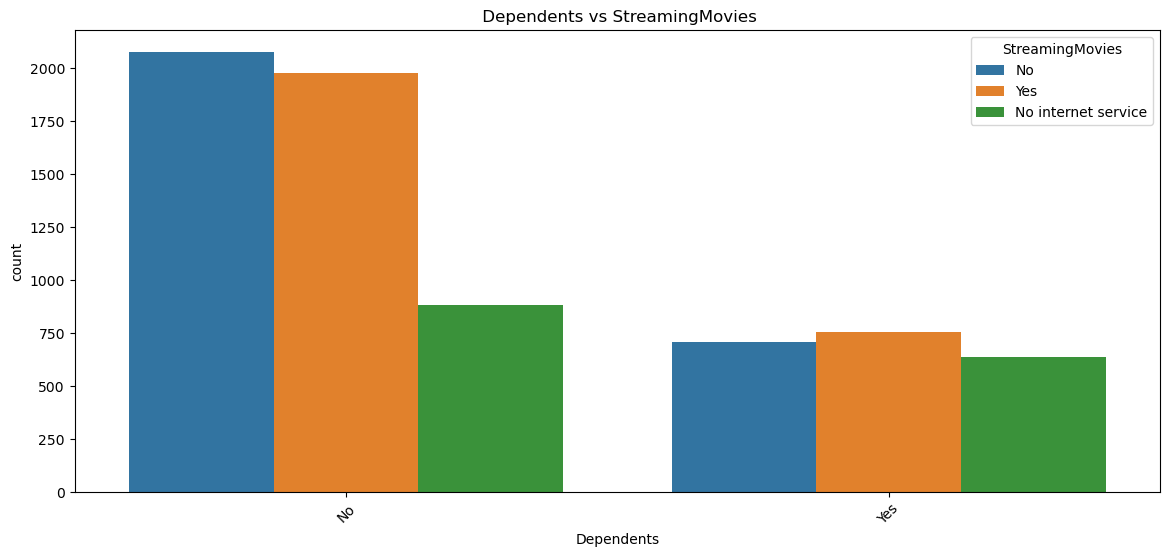

In [113]:
#plotting countplot for Dependents vs StreamingMovies
plt.figure(figsize=(14,6))
sns.countplot(x=df['Dependents'],hue='StreamingMovies',data = df)
plt.title(' Dependents vs StreamingMovies')
plt.xticks(rotation = 45) 
plt.show()

In [114]:
dependent_Contract = df.groupby('Dependents')['Contract'].value_counts()
dependent_Contract

Dependents  Contract      
No          Month-to-month    3086
            One year           942
            Two year           905
Yes         Month-to-month     789
            Two year           780
            One year           530
Name: count, dtype: int64

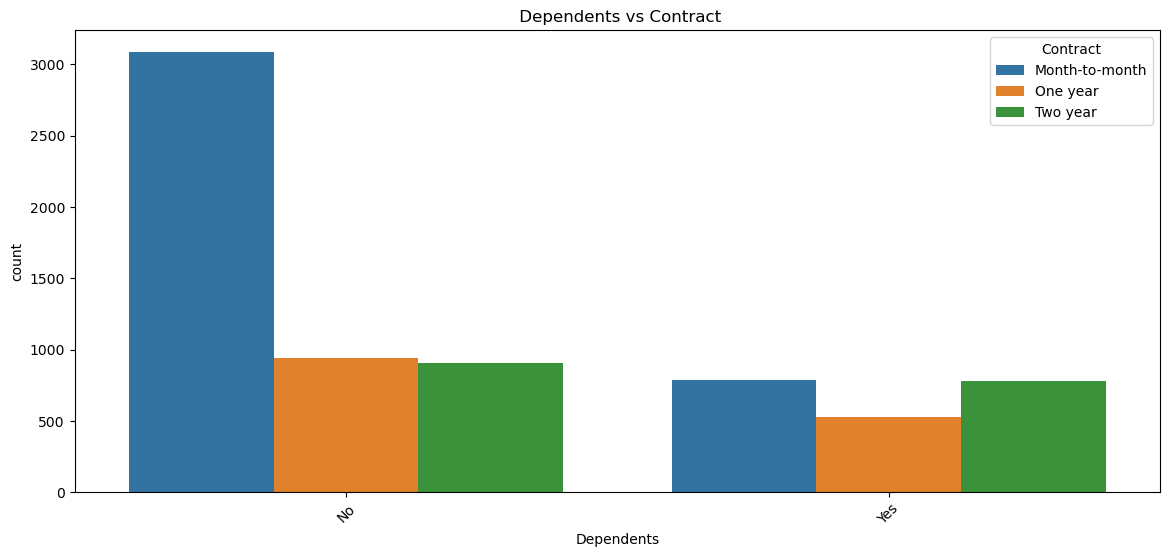

In [115]:
#plotting countplot for Dependents vs Contract
plt.figure(figsize=(14,6))
sns.countplot(x=df['Dependents'],hue='Contract',data = df)
plt.title(' Dependents vs Contract')
plt.xticks(rotation = 45) 
plt.show()

In [116]:
dependent_PaperlessBilling = df.groupby('Dependents')['PaperlessBilling'].value_counts()
dependent_PaperlessBilling

Dependents  PaperlessBilling
No          Yes                 3098
            No                  1835
Yes         Yes                 1070
            No                  1029
Name: count, dtype: int64

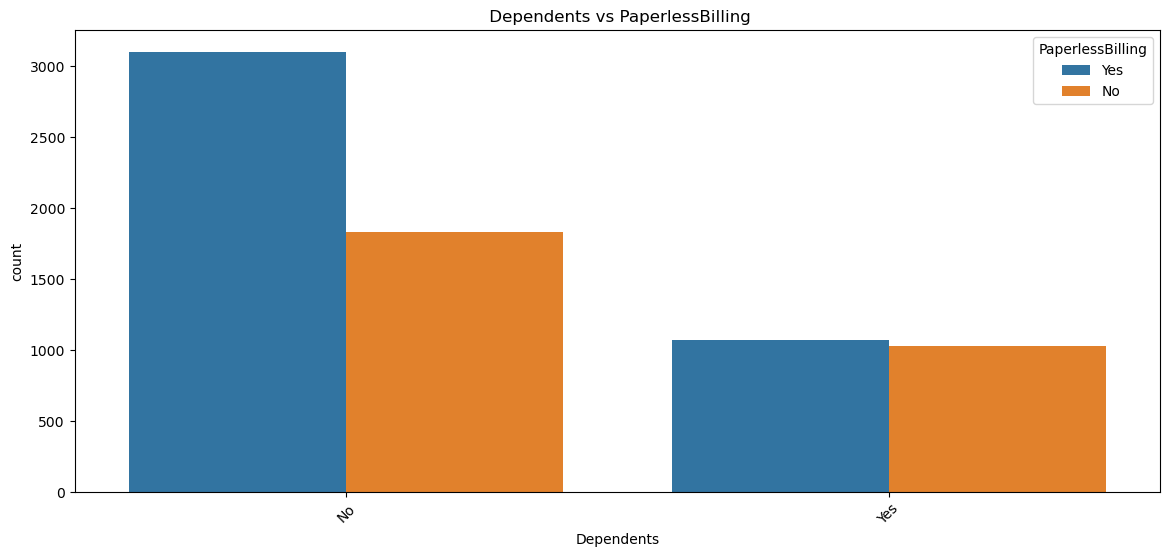

In [117]:
#plotting countplot for Dependents vs PaperlessBilling
plt.figure(figsize=(14,6))
sns.countplot(x=df['Dependents'],hue='PaperlessBilling',data = df)
plt.title(' Dependents vs PaperlessBilling')
plt.xticks(rotation = 45) 
plt.show()

In [118]:
dependent_PaymentMethod = df.groupby('Dependents')['PaymentMethod'].value_counts()
dependent_PaymentMethod

Dependents  PaymentMethod            
No          Electronic check             1886
            Mailed check                 1049
            Bank transfer (automatic)    1012
            Credit card (automatic)       986
Yes         Mailed check                  555
            Credit card (automatic)       535
            Bank transfer (automatic)     530
            Electronic check              479
Name: count, dtype: int64

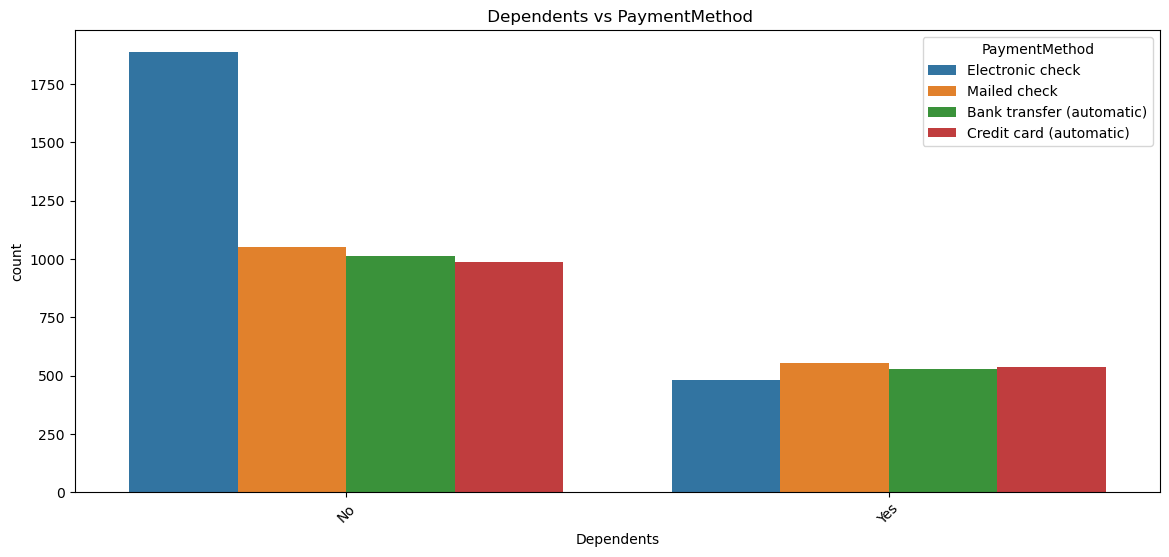

In [119]:
#plotting countplot for Dependents vs PaymentMethod
plt.figure(figsize=(14,6))
sns.countplot(x=df['Dependents'],hue='PaymentMethod',data = df)
plt.title(' Dependents vs PaymentMethod')
plt.xticks(rotation = 45) 
plt.show()

In [120]:
dependent_MonthlyCharges = df.groupby('Dependents')['MonthlyCharges'].mean()
dependent_MonthlyCharges

Dependents
No     67.002808
Yes    59.617032
Name: MonthlyCharges, dtype: float64

In [121]:
dependent_TotalCharges = df.groupby('Dependents')['TotalCharges'].mean()
dependent_TotalCharges

Dependents
No     2187.709254
Yes    2507.955669
Name: TotalCharges, dtype: float64

In [122]:
dependent_Churn = df.groupby('Dependents')['Churn'].value_counts()
dependent_Churn

Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1773
            Yes       326
Name: count, dtype: int64

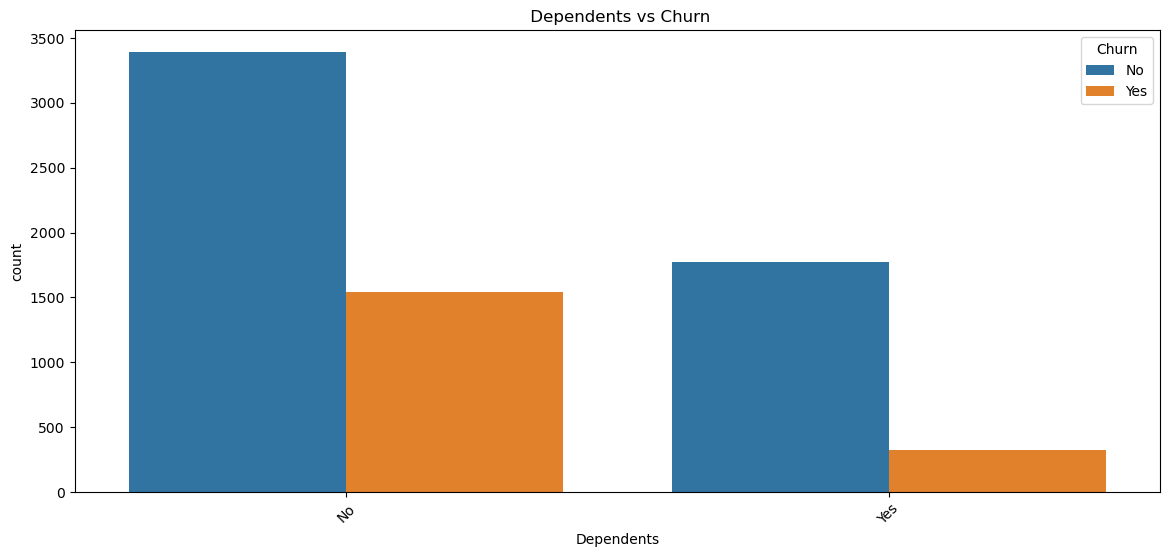

In [123]:
#plotting countplot for Dependents vs churn
plt.figure(figsize=(14,6))
sns.countplot(x=df['Dependents'],hue='Churn',data = df)
plt.title(' Dependents vs Churn')
plt.xticks(rotation = 45) 
plt.show()

# Tenure

In [124]:
Tenure = df.tenure.info()

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7042
Series name: tenure
Non-Null Count  Dtype
--------------  -----
7032 non-null   int64
dtypes: int64(1)
memory usage: 109.9 KB


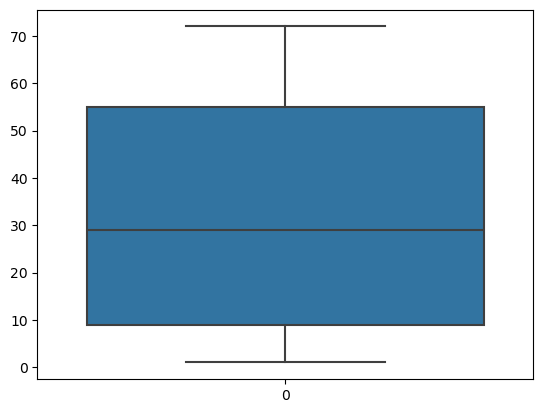

In [125]:
sns.boxplot(df.tenure)
plt.show()

In [126]:
Tenure_cat_col = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [127]:
for col in Tenure_cat_col:
    print(f'Tenure_{col}:')
    print(df.groupby('tenure')[col].value_counts())
    print('\n')
    print('--'*50)

Tenure_PhoneService:
tenure  PhoneService
1       Yes             555
        No               58
2       Yes             218
        No               20
3       Yes             172
                       ... 
70      No               14
71      Yes             158
        No               12
72      Yes             331
        No               31
Name: count, Length: 144, dtype: int64


----------------------------------------------------------------------------------------------------
Tenure_MultipleLines:
tenure  MultipleLines   
1       No                  474
        Yes                  81
        No phone service     58
2       No                  174
        Yes                  44
                           ... 
71      No                   46
        No phone service     12
72      Yes                 280
        No                   51
        No phone service     31
Name: count, Length: 216, dtype: int64


--------------------------------------------------------------------

In [128]:
Tenure_num_col = ['MonthlyCharges', 'TotalCharges']

for col in Tenure_num_col:
    print(f'Tenure_{col}:')
    print(df.groupby('tenure')[col].mean())
    print('\n')
    print('--'*50)

Tenure_MonthlyCharges:
tenure
1     50.485808
2     57.206303
3     58.015000
4     57.432670
5     61.003759
        ...    
68    73.321000
69    70.823158
70    76.378992
71    73.735588
72    80.695856
Name: MonthlyCharges, Length: 72, dtype: float64


----------------------------------------------------------------------------------------------------
Tenure_TotalCharges:
tenure
1       50.485808
2      114.332353
3      174.690000
4      230.530682
5      304.491353
         ...     
68    5006.300000
69    4876.041579
70    5349.057143
71    5238.586176
72    5812.445028
Name: TotalCharges, Length: 72, dtype: float64


----------------------------------------------------------------------------------------------------


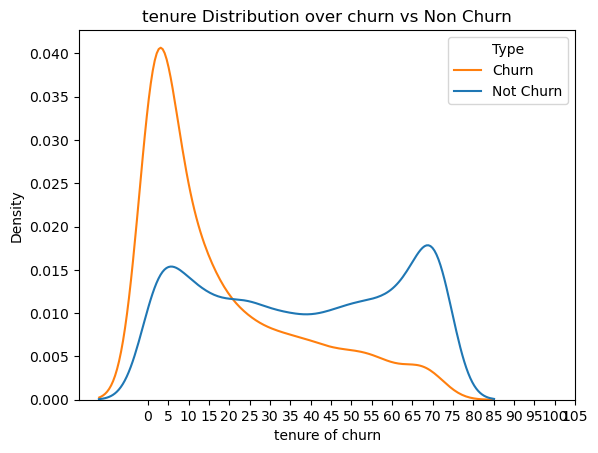

In [129]:
# Creating a new column called age based on dob
sns.kdeplot(x = 'tenure',data = df,hue = 'Churn',common_norm = False)
plt.xlabel('tenure of churn')
plt.ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('tenure Distribution over churn vs Non Churn')
plt.legend(title = 'Type', labels = ['Churn','Not Churn'])

# PhoneService

In [130]:
PhoneService = df['PhoneService'].info()

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7042
Series name: PhoneService
Non-Null Count  Dtype 
--------------  ----- 
7032 non-null   object
dtypes: object(1)
memory usage: 367.9+ KB


PhoneService
Yes    90.32992
No      9.67008
Name: proportion, dtype: float64

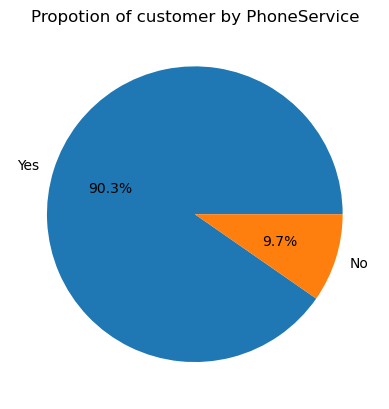

In [131]:
# Count the number of customer for each PhoneService

partner_count = df['PhoneService'].value_counts()
display(df['PhoneService'].value_counts(normalize = True) *100)

# Ploting Pie Chart

plt.pie(partner_count,labels = partner_count.index,autopct = '%1.1f%%')
plt.title('Propotion of customer by PhoneService')
plt.show()

In [132]:
phone_cat_col = ['MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']

In [133]:
for col in phone_cat_col:
    print(f'PhoneService_{col}:')
    print(df.groupby('PhoneService')[col].value_counts())
    print('\n')
    print('--'*50)

PhoneService_MultipleLines:
PhoneService  MultipleLines   
No            No phone service     680
Yes           No                  3385
              Yes                 2967
Name: count, dtype: int64


----------------------------------------------------------------------------------------------------
PhoneService_InternetService:
PhoneService  InternetService
No            DSL                 680
Yes           Fiber optic        3096
              DSL                1736
              No                 1520
Name: count, dtype: int64


----------------------------------------------------------------------------------------------------
PhoneService_OnlineSecurity:
PhoneService  OnlineSecurity     
No            No                      399
              Yes                     281
Yes           No                     3098
              Yes                    1734
              No internet service    1520
Name: count, dtype: int64


-----------------------------------------------------

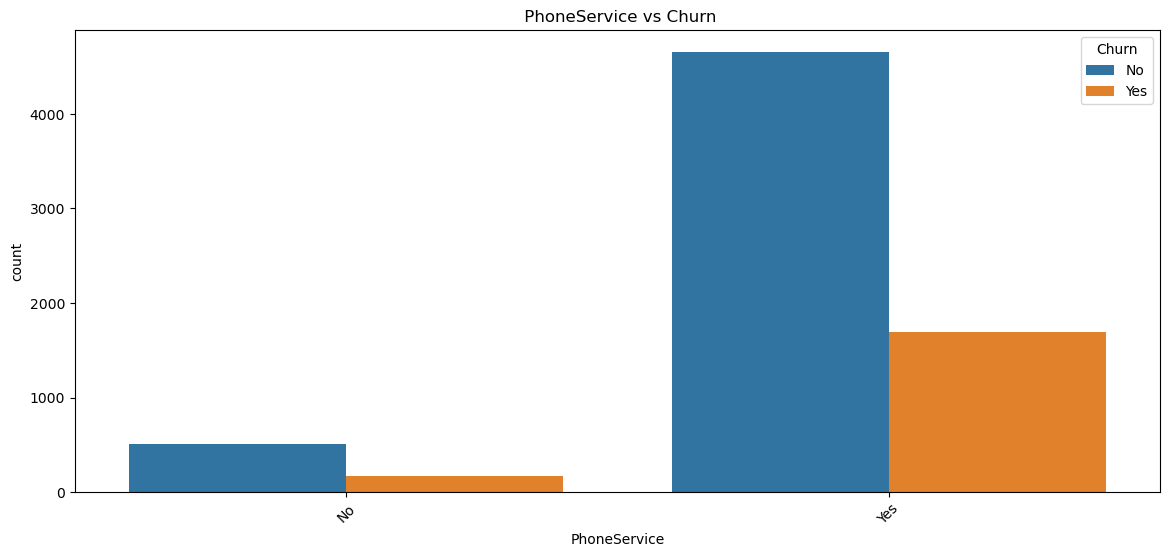

In [134]:
#plotting countplot for PhoneService vs churn
plt.figure(figsize=(14,6))
sns.countplot(x=df['PhoneService'],hue='Churn',data = df)
plt.title(' PhoneService vs Churn')
plt.xticks(rotation = 45) 
plt.show()

In [135]:
phone_num_col = ['MonthlyCharges', 'TotalCharges']
for col in phone_num_col:
    print(f'PhoneService_{col}:')
    print(df.groupby('PhoneService')[col].mean())
    print('\n')
    print('--'*50)

PhoneService_MonthlyCharges:
PhoneService
No     41.992500
Yes    67.239625
Name: MonthlyCharges, dtype: float64


----------------------------------------------------------------------------------------------------
PhoneService_TotalCharges:
PhoneService
No     1500.433750
Yes    2367.108588
Name: TotalCharges, dtype: float64


----------------------------------------------------------------------------------------------------


# MultipleLines

In [136]:
multipleLines = df['MultipleLines'].info()

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7042
Series name: MultipleLines
Non-Null Count  Dtype 
--------------  ----- 
7032 non-null   object
dtypes: object(1)
memory usage: 367.9+ KB


MultipleLines
No                  48.137088
Yes                 42.192833
No phone service     9.670080
Name: proportion, dtype: float64

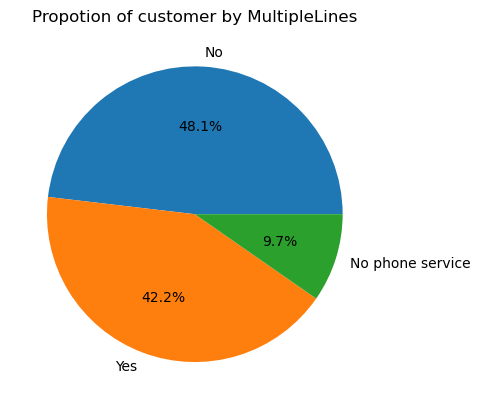

In [137]:
# Count the number of customer for each MultipleLines

partner_count = df['MultipleLines'].value_counts()
display(df['MultipleLines'].value_counts(normalize = True) *100)

# Ploting Pie Chart

plt.pie(partner_count,labels = partner_count.index,autopct = '%1.1f%%')
plt.title('Propotion of customer by MultipleLines')
plt.show()

In [138]:
MultipleLines_cat_col =[ 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']

In [139]:
for col in MultipleLines_cat_col:
    print(f'MultipleLines_{col}:')
    print(df.groupby('MultipleLines')[col].value_counts())
    print('\n')
    print('--'*50)

MultipleLines_InternetService:
MultipleLines     InternetService
No                No                 1180
                  Fiber optic        1158
                  DSL                1047
No phone service  DSL                 680
Yes               Fiber optic        1938
                  DSL                 689
                  No                  340
Name: count, dtype: int64


----------------------------------------------------------------------------------------------------
MultipleLines_OnlineSecurity:
MultipleLines     OnlineSecurity     
No                No                     1476
                  No internet service    1180
                  Yes                     729
No phone service  No                      399
                  Yes                     281
Yes               No                     1622
                  Yes                    1005
                  No internet service     340
Name: count, dtype: int64


------------------------------------------------

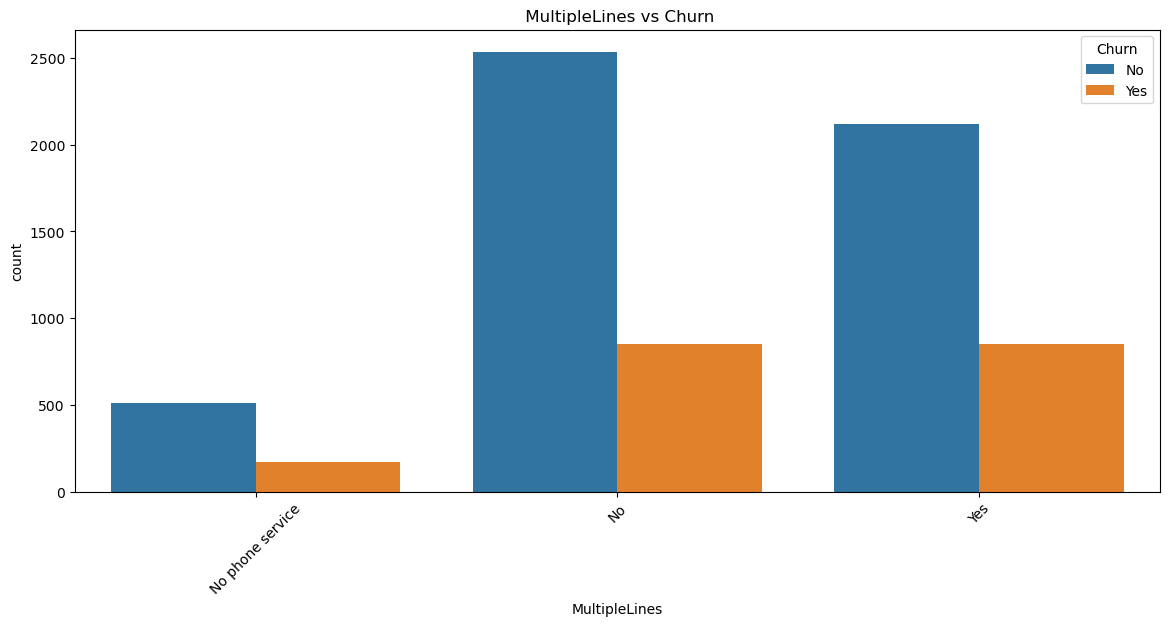

In [140]:
#plotting countplot for MultipleLines vs churn
plt.figure(figsize=(14,6))
sns.countplot(x=df['MultipleLines'],hue='Churn',data = df)
plt.title(' MultipleLines vs Churn')
plt.xticks(rotation = 45) 
plt.show()

In [141]:
MultipleLines_num_col = ['MonthlyCharges', 'TotalCharges']
for col in MultipleLines_num_col:
    print(f'MultipleLines_{col}:')
    print(df.groupby('MultipleLines')[col].mean())
    print('\n')
    print('--'*50)

MultipleLines_MonthlyCharges:
MultipleLines
No                  54.227651
No phone service    41.992500
Yes                 82.084766
Name: MonthlyCharges, dtype: float64


----------------------------------------------------------------------------------------------------
MultipleLines_TotalCharges:
MultipleLines
No                  1349.833058
No phone service    1500.433750
Yes                 3527.700994
Name: TotalCharges, dtype: float64


----------------------------------------------------------------------------------------------------


# InternetService

In [142]:
InternetService = df['InternetService'].info()

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7042
Series name: InternetService
Non-Null Count  Dtype 
--------------  ----- 
7032 non-null   object
dtypes: object(1)
memory usage: 367.9+ KB


InternetService
Fiber optic    44.027304
DSL            34.357224
No             21.615472
Name: proportion, dtype: float64

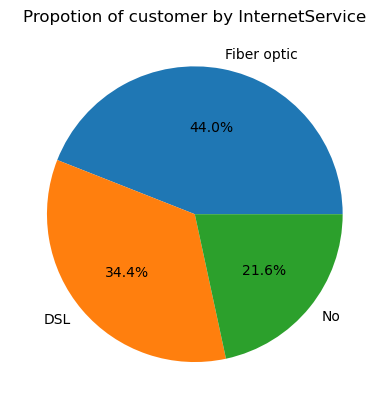

In [143]:
# Count the number of customer for each InternetService

partner_count = df['InternetService'].value_counts()
display(df['InternetService'].value_counts(normalize = True) *100)

# Ploting Pie Chart

plt.pie(partner_count,labels = partner_count.index,autopct = '%1.1f%%')
plt.title('Propotion of customer by InternetService')
plt.show()

In [144]:
InternetService_cat_col =['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']

In [145]:
for col in InternetService_cat_col:
    print(f'InternetService_{col}:')
    print(df.groupby('InternetService')[col].value_counts())
    print('\n')
    print('--'*50)   

InternetService_OnlineSecurity:
InternetService  OnlineSecurity     
DSL              No                     1240
                 Yes                    1176
Fiber optic      No                     2257
                 Yes                     839
No               No internet service    1520
Name: count, dtype: int64


----------------------------------------------------------------------------------------------------
InternetService_OnlineBackup:
InternetService  OnlineBackup       
DSL              No                     1334
                 Yes                    1082
Fiber optic      No                     1753
                 Yes                    1343
No               No internet service    1520
Name: count, dtype: int64


----------------------------------------------------------------------------------------------------
InternetService_DeviceProtection:
InternetService  DeviceProtection   
DSL              No                     1355
                 Yes                    

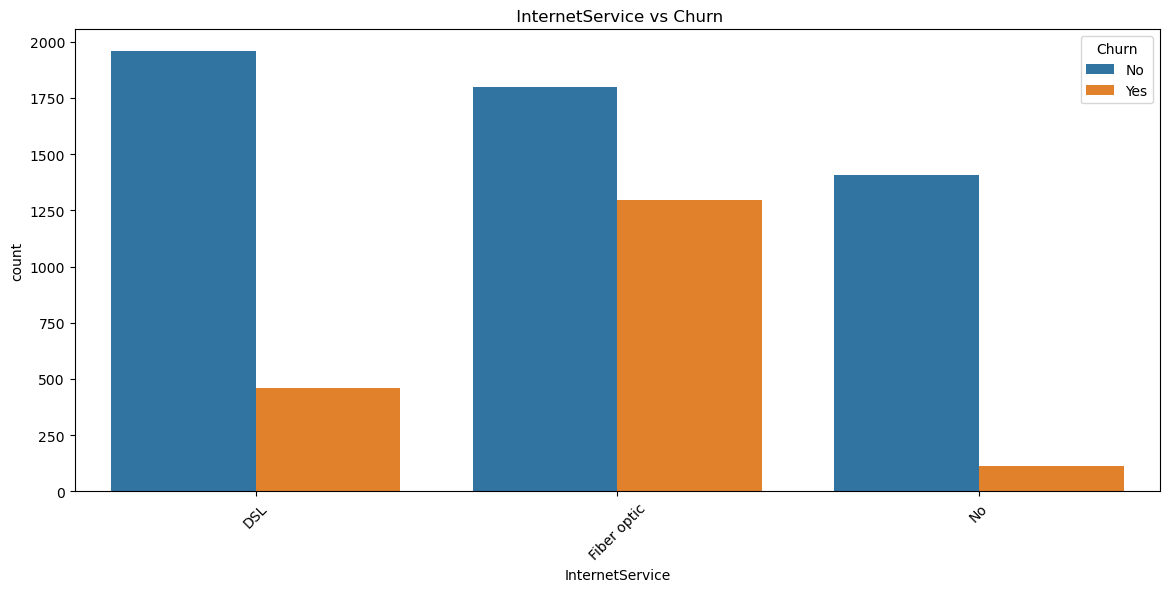

In [146]:
#plotting countplot for InternetService vs churn
plt.figure(figsize=(14,6))
sns.countplot(x=df['InternetService'],hue='Churn',data = df)
plt.title(' InternetService vs Churn')
plt.xticks(rotation = 45) 
plt.show()

In [147]:
InternetService_num_col = ['MonthlyCharges', 'TotalCharges']
for col in InternetService_num_col:
    print(f'InternetService_{col}:')
    print(df.groupby('InternetService')[col].mean())
    print('\n')
    print('--'*50) 

InternetService_MonthlyCharges:
InternetService
DSL            58.088017
Fiber optic    91.500129
No             21.076283
Name: MonthlyCharges, dtype: float64


----------------------------------------------------------------------------------------------------
InternetService_TotalCharges:
InternetService
DSL            2119.789259
Fiber optic    3205.304570
No              665.220329
Name: TotalCharges, dtype: float64


----------------------------------------------------------------------------------------------------


# OnlineSecurity

In [148]:
OnlineSecurity = df['OnlineSecurity'].info()

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7042
Series name: OnlineSecurity
Non-Null Count  Dtype 
--------------  ----- 
7032 non-null   object
dtypes: object(1)
memory usage: 367.9+ KB


OnlineSecurity
No                     49.729807
Yes                    28.654721
No internet service    21.615472
Name: proportion, dtype: float64

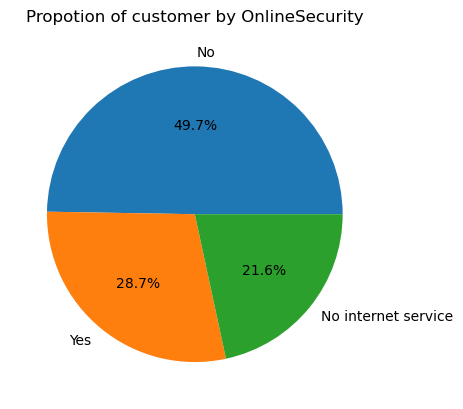

In [149]:
# Count the number of customer for each OnlineSecurity

partner_count = df['OnlineSecurity'].value_counts()
display(df['OnlineSecurity'].value_counts(normalize = True) *100)

# Ploting Pie Chart

plt.pie(partner_count,labels = partner_count.index,autopct = '%1.1f%%')
plt.title('Propotion of customer by OnlineSecurity')
plt.show()

In [150]:
OnlineSecurity_cat_col =['OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']

In [151]:
for col in OnlineSecurity_cat_col:
    print(f'OnlineSecurity_{col}:')
    print(df.groupby('OnlineSecurity')[col].value_counts())
    print('\n')
    print('--'*50) 

OnlineSecurity_OnlineBackup:
OnlineSecurity       OnlineBackup       
No                   No                     2195
                     Yes                    1302
No internet service  No internet service    1520
Yes                  Yes                    1123
                     No                      892
Name: count, dtype: int64


----------------------------------------------------------------------------------------------------
OnlineSecurity_DeviceProtection:
OnlineSecurity       DeviceProtection   
No                   No                     2187
                     Yes                    1310
No internet service  No internet service    1520
Yes                  Yes                    1108
                     No                      907
Name: count, dtype: int64


----------------------------------------------------------------------------------------------------
OnlineSecurity_TechSupport:
OnlineSecurity       TechSupport        
No                   No                

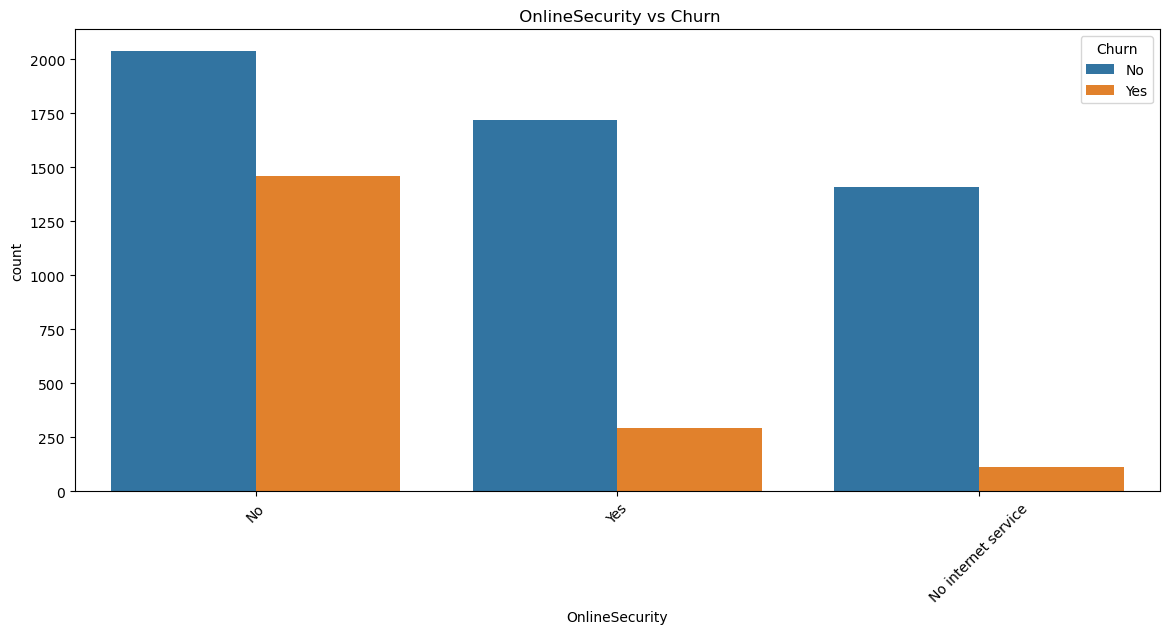

In [152]:
#plotting countplot for OnlineSecurity vs churn
plt.figure(figsize=(14,6))
sns.countplot(x=df['OnlineSecurity'],hue='Churn',data = df)
plt.title(' OnlineSecurity vs Churn')
plt.xticks(rotation = 45) 
plt.show()

In [153]:
OnlineSecurity_num_col =[ 'MonthlyCharges', 'TotalCharges']
for col in OnlineSecurity_num_col:
    print(f'OnlineSecurity_{col}:')
    print(df.groupby('OnlineSecurity')[col].mean())
    print('\n')
    print('--'*50)

OnlineSecurity_MonthlyCharges:
OnlineSecurity
No                     75.693737
No internet service    21.076283
Yes                    78.870496
Name: MonthlyCharges, dtype: float64


----------------------------------------------------------------------------------------------------
OnlineSecurity_TotalCharges:
OnlineSecurity
No                     2136.277938
No internet service     665.220329
Yes                    3759.042109
Name: TotalCharges, dtype: float64


----------------------------------------------------------------------------------------------------


# OnlineBackup

In [154]:
OnlineBackup = df['OnlineBackup'].info()

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7042
Series name: OnlineBackup
Non-Null Count  Dtype 
--------------  ----- 
7032 non-null   object
dtypes: object(1)
memory usage: 367.9+ KB


OnlineBackup
No                     43.899317
Yes                    34.485210
No internet service    21.615472
Name: proportion, dtype: float64

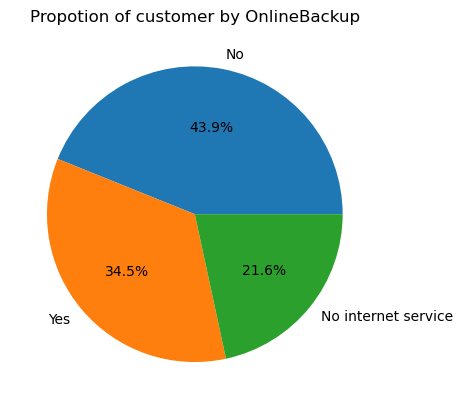

In [155]:
# Count the number of customer for each OnlineBackup

partner_count = df['OnlineBackup'].value_counts()
display(df['OnlineBackup'].value_counts(normalize = True) *100)

# Ploting Pie Chart

plt.pie(partner_count,labels = partner_count.index,autopct = '%1.1f%%')
plt.title('Propotion of customer by OnlineBackup')
plt.show()

In [156]:
OnlineBackup_cat_col =['DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']

In [157]:
for col in OnlineBackup_cat_col:
    print(f'OnlineBackup_{col}:')
    print(df.groupby('OnlineBackup')[col].value_counts())
    print('\n')
    print('--'*50)    

OnlineBackup_DeviceProtection:
OnlineBackup         DeviceProtection   
No                   No                     1984
                     Yes                    1103
No internet service  No internet service    1520
Yes                  Yes                    1315
                     No                     1110
Name: count, dtype: int64


----------------------------------------------------------------------------------------------------
OnlineBackup_TechSupport:
OnlineBackup         TechSupport        
No                   No                     2196
                     Yes                     891
No internet service  No internet service    1520
Yes                  No                     1276
                     Yes                    1149
Name: count, dtype: int64


----------------------------------------------------------------------------------------------------
OnlineBackup_StreamingTV:
OnlineBackup         StreamingTV        
No                   No                     17

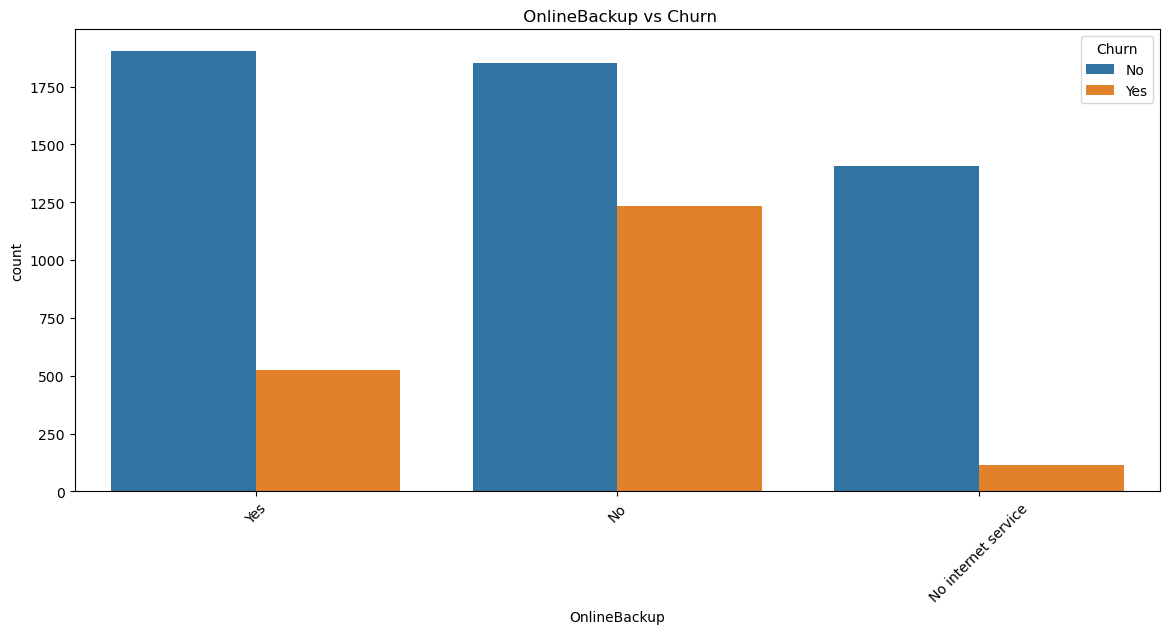

In [158]:
#plotting countplot for OnlineBackup vs churn
plt.figure(figsize=(14,6))
sns.countplot(x=df['OnlineBackup'],hue='Churn',data = df)
plt.title(' OnlineBackup vs Churn')
plt.xticks(rotation = 45) 
plt.show()

In [159]:
OnlineBackup_num_col = ['MonthlyCharges', 'TotalCharges']
for col in OnlineBackup_num_col:
    print(f'OnlineBackup_{col}:')
    print(df.groupby('OnlineBackup')[col].mean())
    print('\n')
    print('--'*50) 

OnlineBackup_MonthlyCharges:
OnlineBackup
No                     71.944282
No internet service    21.076283
Yes                    83.106412
Name: MonthlyCharges, dtype: float64


----------------------------------------------------------------------------------------------------
OnlineBackup_TotalCharges:
OnlineBackup
No                     1828.148364
No internet service     665.220329
Yes                    3876.923629
Name: TotalCharges, dtype: float64


----------------------------------------------------------------------------------------------------


# DeviceProtection

In [160]:
DeviceProtection = df['DeviceProtection'].info()

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7042
Series name: DeviceProtection
Non-Null Count  Dtype 
--------------  ----- 
7032 non-null   object
dtypes: object(1)
memory usage: 367.9+ KB


DeviceProtection
No                     43.998862
Yes                    34.385666
No internet service    21.615472
Name: proportion, dtype: float64

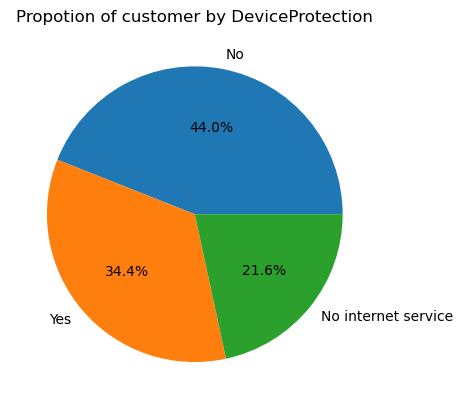

In [161]:
# Count the number of customer for each DeviceProtection

partner_count = df['DeviceProtection'].value_counts()
display(df['DeviceProtection'].value_counts(normalize = True) *100)

# Ploting Pie Chart

plt.pie(partner_count,labels = partner_count.index,autopct = '%1.1f%%')
plt.title('Propotion of customer by DeviceProtection')
plt.show()

In [162]:
DeviceProtection_cat_col = ['TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']
for col in DeviceProtection_cat_col:
    print(f'DeviceProtection_{col}:')
    print(df.groupby('DeviceProtection')[col].value_counts())
    print('\n')
    print('--'*50)

DeviceProtection_TechSupport:
DeviceProtection     TechSupport        
No                   No                     2260
                     Yes                     834
No internet service  No internet service    1520
Yes                  No                     1212
                     Yes                    1206
Name: count, dtype: int64


----------------------------------------------------------------------------------------------------
DeviceProtection_StreamingTV:
DeviceProtection     StreamingTV        
No                   No                     1954
                     Yes                    1140
No internet service  No internet service    1520
Yes                  Yes                    1563
                     No                      855
Name: count, dtype: int64


----------------------------------------------------------------------------------------------------
DeviceProtection_StreamingMovies:
DeviceProtection     StreamingMovies    
No                   No            

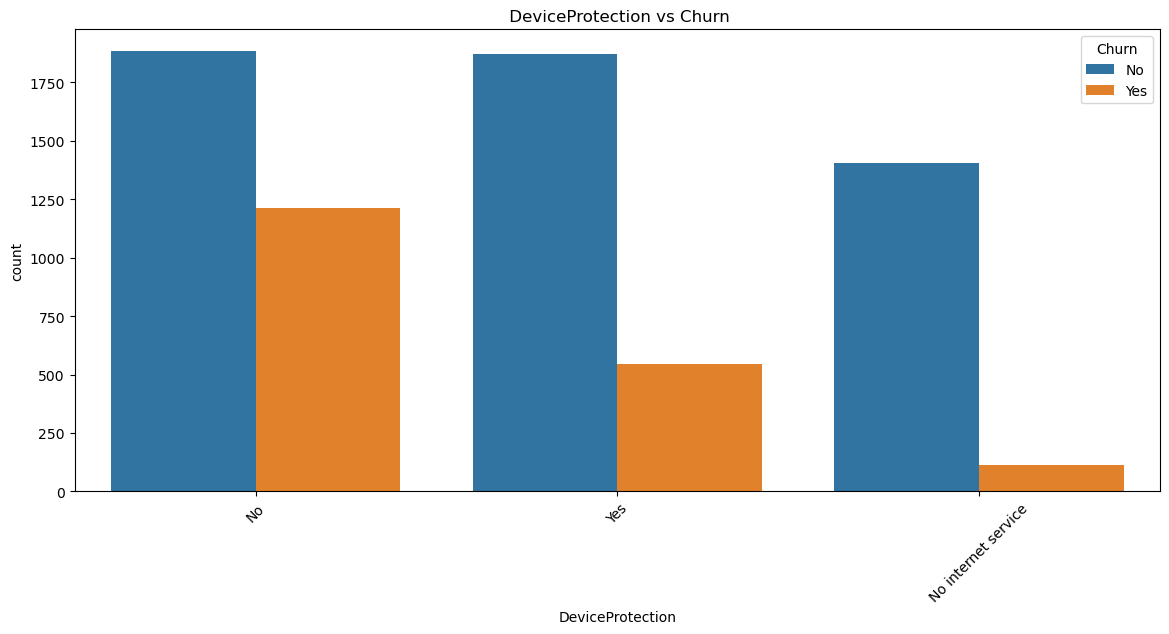

In [163]:
#plotting countplot for Device protection vs churn
plt.figure(figsize=(14,6))
sns.countplot(x=df['DeviceProtection'],hue='Churn',data = df)
plt.title(' DeviceProtection vs Churn')
plt.xticks(rotation = 45) 
plt.show()

In [164]:
DeviceProtection_num_col = ['MonthlyCharges', 'TotalCharges']
for col in DeviceProtection_num_col:
    print(f'DeviceProtection_{col}:')
    print(df.groupby('DeviceProtection')[col].mean())
    print('\n')
    print('--'*50)

DeviceProtection_MonthlyCharges:
DeviceProtection
No                     70.603862
No internet service    21.076283
Yes                    84.853888
Name: MonthlyCharges, dtype: float64


----------------------------------------------------------------------------------------------------
DeviceProtection_TotalCharges:
DeviceProtection
No                     1798.760149
No internet service     665.220329
Yes                    3920.459016
Name: TotalCharges, dtype: float64


----------------------------------------------------------------------------------------------------


# TechSupport

In [165]:
TechSupport = df['TechSupport'].info()

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7042
Series name: TechSupport
Non-Null Count  Dtype 
--------------  ----- 
7032 non-null   object
dtypes: object(1)
memory usage: 367.9+ KB


TechSupport
No                     49.374289
Yes                    29.010239
No internet service    21.615472
Name: proportion, dtype: float64

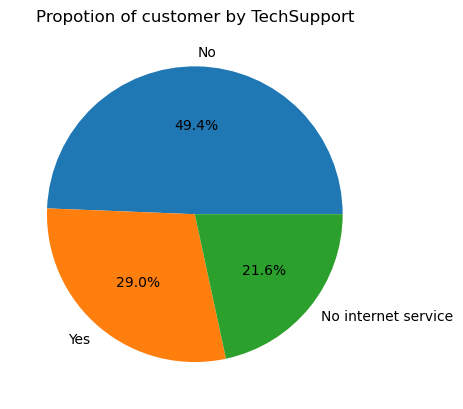

In [166]:
# Count the number of customer for each TechSupport

partner_count = df['TechSupport'].value_counts()
display(df['TechSupport'].value_counts(normalize = True) *100)

# Ploting Pie Chart

plt.pie(partner_count,labels = partner_count.index,autopct = '%1.1f%%')
plt.title('Propotion of customer by TechSupport')
plt.show()

In [167]:
TechSupport_cat_col = ['StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
for col in TechSupport_cat_col:
    print(f'TechSupport_{col}:')
    print(df.groupby('TechSupport')[col].value_counts())
    print('\n')
    print('--'*50)

TechSupport_StreamingTV:
TechSupport          StreamingTV        
No                   No                     1984
                     Yes                    1488
No internet service  No internet service    1520
Yes                  Yes                    1215
                     No                      825
Name: count, dtype: int64


----------------------------------------------------------------------------------------------------
TechSupport_StreamingMovies:
TechSupport          StreamingMovies    
No                   No                     1969
                     Yes                    1503
No internet service  No internet service    1520
Yes                  Yes                    1228
                     No                      812
Name: count, dtype: int64


----------------------------------------------------------------------------------------------------
TechSupport_Contract:
TechSupport          Contract      
No                   Month-to-month    2680
              

In [168]:
TechSupport_num_col = ['MonthlyCharges', 'TotalCharges']
for col in TechSupport_num_col:
    print(f'TechSupport_{col}:')
    print(df.groupby('TechSupport')[col].mean())
    print('\n')
    print('--'*50)

TechSupport_MonthlyCharges:
TechSupport
No                     74.584879
No internet service    21.076283
Yes                    80.718799
Name: MonthlyCharges, dtype: float64


----------------------------------------------------------------------------------------------------
TechSupport_TotalCharges:
TechSupport
No                     2089.886679
No internet service     665.220329
Yes                    3818.111397
Name: TotalCharges, dtype: float64


----------------------------------------------------------------------------------------------------


# StreamingTV

In [169]:
StreamingTV = df['StreamingTV'].info()

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7042
Series name: StreamingTV
Non-Null Count  Dtype 
--------------  ----- 
7032 non-null   object
dtypes: object(1)
memory usage: 367.9+ KB


StreamingTV
No                     39.945961
Yes                    38.438567
No internet service    21.615472
Name: proportion, dtype: float64

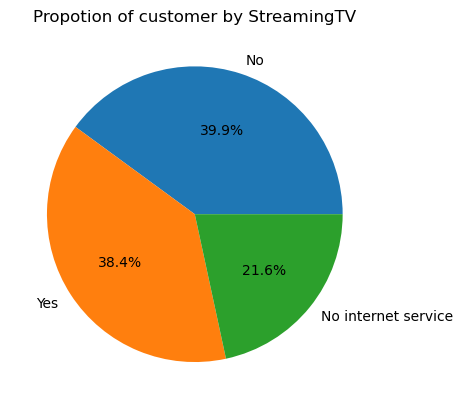

In [170]:
# Count the number of customer for each StreamingTV

partner_count = df['StreamingTV'].value_counts()
display(df['StreamingTV'].value_counts(normalize = True) *100)

# Ploting Pie Chart

plt.pie(partner_count,labels = partner_count.index,autopct = '%1.1f%%')
plt.title('Propotion of customer by StreamingTV')
plt.show()

In [171]:
StreamingTV_cat_col = ['StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
for col in StreamingTV_cat_col:
    print(f'StreamingTV_{col}:')
    print(df.groupby('StreamingTV')[col].value_counts())
    print('\n')
    print('--'*50)

StreamingTV_StreamingMovies:
StreamingTV          StreamingMovies    
No                   No                     2017
                     Yes                     792
No internet service  No internet service    1520
Yes                  Yes                    1939
                     No                      764
Name: count, dtype: int64


----------------------------------------------------------------------------------------------------
StreamingTV_Contract:
StreamingTV          Contract      
No                   Month-to-month    2053
                     One year           457
                     Two year           299
No internet service  Two year           633
                     Month-to-month     524
                     One year           363
Yes                  Month-to-month    1298
                     Two year           753
                     One year           652
Name: count, dtype: int64


--------------------------------------------------------------------------

In [172]:
StreamingTV_num_col = ['MonthlyCharges', 'TotalCharges']
for col in StreamingTV_num_col:
    print(f'StreamingTV_{col}:')
    print(df.groupby('StreamingTV')[col].mean())
    print('\n')
    print('--'*50)

StreamingTV_MonthlyCharges:
StreamingTV
No                     65.388928
No internet service    21.076283
Yes                    88.770829
Name: MonthlyCharges, dtype: float64


----------------------------------------------------------------------------------------------------
StreamingTV_TotalCharges:
StreamingTV
No                     1735.407796
No internet service     665.220329
Yes                    3762.587236
Name: TotalCharges, dtype: float64


----------------------------------------------------------------------------------------------------


# StreamingMovies

In [173]:
StreamingMovies = df['StreamingMovies'].info()

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7042
Series name: StreamingMovies
Non-Null Count  Dtype 
--------------  ----- 
7032 non-null   object
dtypes: object(1)
memory usage: 367.9+ KB


StreamingMovies
No                     39.547782
Yes                    38.836746
No internet service    21.615472
Name: proportion, dtype: float64

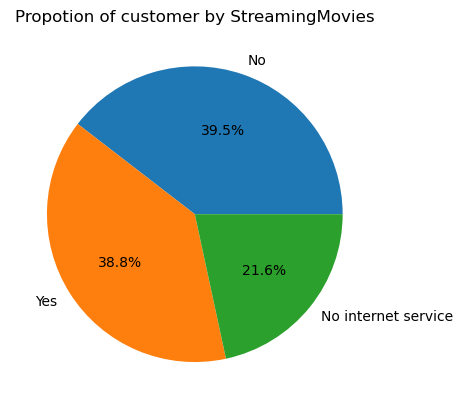

In [174]:
# Count the number of customer for each StreamingMovies

partner_count = df['StreamingMovies'].value_counts()
display(df['StreamingMovies'].value_counts(normalize = True) *100)

# Ploting Pie Chart

plt.pie(partner_count,labels = partner_count.index,autopct = '%1.1f%%')
plt.title('Propotion of customer by StreamingMovies')
plt.show()

In [175]:
StreamingMovies_cat_col= [ 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
for col in StreamingMovies_cat_col:
    print(f'StreamingMovies_{col}:')
    print(df.groupby('StreamingMovies')[col].value_counts())
    print('\n')
    print('--'*50)

StreamingMovies_Contract:
StreamingMovies      Contract      
No                   Month-to-month    2047
                     One year           447
                     Two year           287
No internet service  Two year           633
                     Month-to-month     524
                     One year           363
Yes                  Month-to-month    1304
                     Two year           765
                     One year           662
Name: count, dtype: int64


----------------------------------------------------------------------------------------------------
StreamingMovies_PaperlessBilling:
StreamingMovies      PaperlessBilling
No                   Yes                 1748
                     No                  1033
No internet service  No                  1075
                     Yes                  445
Yes                  Yes                 1975
                     No                   756
Name: count, dtype: int64


-------------------------------------

In [176]:
StreamingMovies_num_col = ['MonthlyCharges', 'TotalCharges']
for col in StreamingMovies_num_col:
    print(f'StreamingMovies_{col}:')
    print(df.groupby('StreamingMovies')[col].mean())
    print('\n')
    print('--'*50)

StreamingMovies_MonthlyCharges:
StreamingMovies
No                     65.440579
No internet service    21.076283
Yes                    88.478506
Name: MonthlyCharges, dtype: float64


----------------------------------------------------------------------------------------------------
StreamingMovies_TotalCharges:
StreamingMovies
No                     1715.531967
No internet service     665.220329
Yes                    3762.042988
Name: TotalCharges, dtype: float64


----------------------------------------------------------------------------------------------------


# Contract

In [177]:
Contract = df['Contract'].info()

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7042
Series name: Contract
Non-Null Count  Dtype 
--------------  ----- 
7032 non-null   object
dtypes: object(1)
memory usage: 367.9+ KB


Contract
Month-to-month    55.105233
Two year          23.961889
One year          20.932878
Name: proportion, dtype: float64

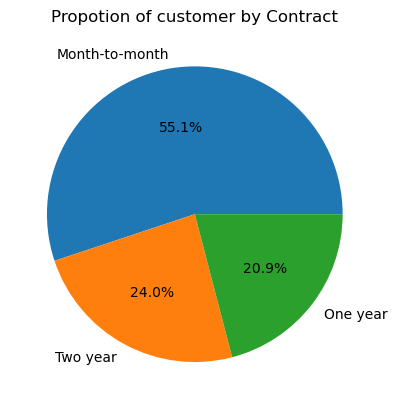

In [178]:
# Count the number of customer for each Contract

partner_count = df['Contract'].value_counts()
display(df['Contract'].value_counts(normalize = True) *100)

# Ploting Pie Chart

plt.pie(partner_count,labels = partner_count.index,autopct = '%1.1f%%')
plt.title('Propotion of customer by Contract')
plt.show()

In [179]:
Contract_cat_col= ['PaperlessBilling',
       'PaymentMethod', 'Churn']
for col in Contract_cat_col:
    print(f'Contract_{col}:')
    print(df.groupby('Contract')[col].value_counts())
    print('\n')
    print('--'*50)

Contract_PaperlessBilling:
Contract        PaperlessBilling
Month-to-month  Yes                 2586
                No                  1289
One year        Yes                  799
                No                   673
Two year        No                   902
                Yes                  783
Name: count, dtype: int64


----------------------------------------------------------------------------------------------------
Contract_PaymentMethod:
Contract        PaymentMethod            
Month-to-month  Electronic check             1850
                Mailed check                  893
                Bank transfer (automatic)     589
                Credit card (automatic)       543
One year        Credit card (automatic)       398
                Bank transfer (automatic)     391
                Electronic check              347
                Mailed check                  336
Two year        Credit card (automatic)       580
                Bank transfer (automatic)     562

In [180]:
Contract_num_col = ['MonthlyCharges', 'TotalCharges']
for col in Contract_num_col:
    print(f'Contract_{col}:')
    print(df.groupby('Contract')[col].mean())
    print('\n')
    print('--'*50)

Contract_MonthlyCharges:
Contract
Month-to-month    66.398490
One year          65.079416
Two year          60.872374
Name: MonthlyCharges, dtype: float64


----------------------------------------------------------------------------------------------------
Contract_TotalCharges:
Contract
Month-to-month    1369.254581
One year          3034.683084
Two year          3728.933947
Name: TotalCharges, dtype: float64


----------------------------------------------------------------------------------------------------


# PaperlessBilling

In [181]:
PaperlessBilling = df['PaperlessBilling'].info()

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7042
Series name: PaperlessBilling
Non-Null Count  Dtype 
--------------  ----- 
7032 non-null   object
dtypes: object(1)
memory usage: 367.9+ KB


PaperlessBilling
Yes    59.2719
No     40.7281
Name: proportion, dtype: float64

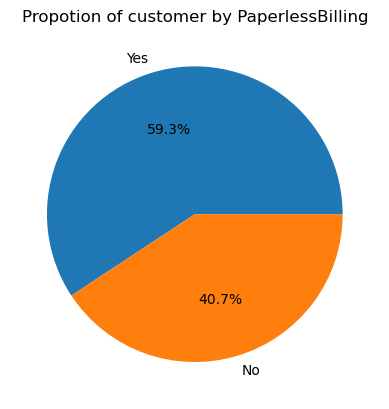

In [182]:
# Count the number of customer for each PaperlessBilling

partner_count = df['PaperlessBilling'].value_counts()
display(df['PaperlessBilling'].value_counts(normalize = True) *100)

# Ploting Pie Chart

plt.pie(partner_count,labels = partner_count.index,autopct = '%1.1f%%')
plt.title('Propotion of customer by PaperlessBilling')
plt.show()

In [183]:
PaperlessBilling_cat_col= ['PaymentMethod', 'Churn']
for col in PaperlessBilling_cat_col:
    print(f'PaperlessBilling_{col}:')
    print(df.groupby('PaperlessBilling')[col].value_counts())
    print('\n')
    print('--'*50)

PaperlessBilling_PaymentMethod:
PaperlessBilling  PaymentMethod            
No                Mailed check                  949
                  Bank transfer (automatic)     653
                  Credit card (automatic)       639
                  Electronic check              623
Yes               Electronic check             1742
                  Bank transfer (automatic)     889
                  Credit card (automatic)       882
                  Mailed check                  655
Name: count, dtype: int64


----------------------------------------------------------------------------------------------------
PaperlessBilling_Churn:
PaperlessBilling  Churn
No                No       2395
                  Yes       469
Yes               No       2768
                  Yes      1400
Name: count, dtype: int64


----------------------------------------------------------------------------------------------------


In [184]:
PaperlessBilling_num_col = ['MonthlyCharges', 'TotalCharges']
for col in PaperlessBilling_num_col:
    print(f'PaperlessBilling_{col}:')
    print(df.groupby('PaperlessBilling')[col].mean())
    print('\n')
    print('--'*50)

PaperlessBilling_MonthlyCharges:
PaperlessBilling
No     52.025960
Yes    73.574532
Name: MonthlyCharges, dtype: float64


----------------------------------------------------------------------------------------------------
PaperlessBilling_TotalCharges:
PaperlessBilling
No     1851.738495
Yes    2579.843966
Name: TotalCharges, dtype: float64


----------------------------------------------------------------------------------------------------


# PaymentMethod

In [185]:
PaymentMethod = df['PaymentMethod'].info()

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7042
Series name: PaymentMethod
Non-Null Count  Dtype 
--------------  ----- 
7032 non-null   object
dtypes: object(1)
memory usage: 367.9+ KB


PaymentMethod
Electronic check             33.631968
Mailed check                 22.810011
Bank transfer (automatic)    21.928328
Credit card (automatic)      21.629693
Name: proportion, dtype: float64

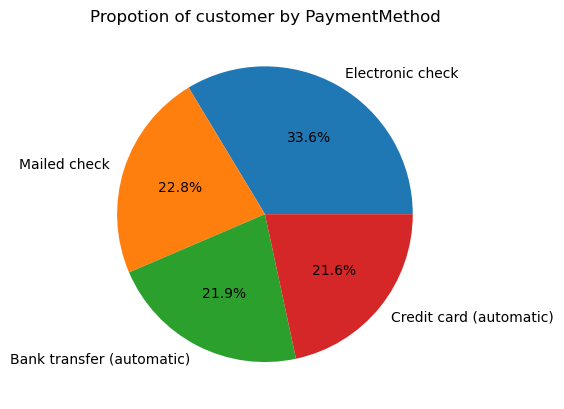

In [186]:
# Count the number of customer for each PaymentMethod

partner_count = df['PaymentMethod'].value_counts()
display(df['PaymentMethod'].value_counts(normalize = True) *100)

# Ploting Pie Chart

plt.pie(partner_count,labels = partner_count.index,autopct = '%1.1f%%')
plt.title('Propotion of customer by PaymentMethod')
plt.show()

In [187]:
PaymentMethod_cat_col = ["Churn"]
for col in PaymentMethod_cat_col:
    print(f'PaymentMethod{col}:')
    print(df.groupby('PaymentMethod')[col].value_counts())
    print('\n')
    print('--'*50)

PaymentMethodChurn:
PaymentMethod              Churn
Bank transfer (automatic)  No       1284
                           Yes       258
Credit card (automatic)    No       1289
                           Yes       232
Electronic check           No       1294
                           Yes      1071
Mailed check               No       1296
                           Yes       308
Name: count, dtype: int64


----------------------------------------------------------------------------------------------------


In [188]:
PaymentMethod_num_col =['MonthlyCharges', 'TotalCharges']
for col in PaymentMethod_num_col:
    print(f'PaymentMethod_{col} :')
    print(df.groupby('PaymentMethod')[col].sum())
    print('\n')
    print('--'*50)

PaymentMethod_MonthlyCharges :
PaymentMethod
Bank transfer (automatic)    103631.0
Credit card (automatic)      101175.8
Electronic check             180345.0
Mailed check                  70509.2
Name: MonthlyCharges, dtype: float64


----------------------------------------------------------------------------------------------------
PaymentMethod_TotalCharges :
PaymentMethod
Bank transfer (automatic)    4748279.90
Credit card (automatic)      4671593.35
Electronic check             4944903.25
Mailed check                 1691392.20
Name: TotalCharges, dtype: float64


----------------------------------------------------------------------------------------------------


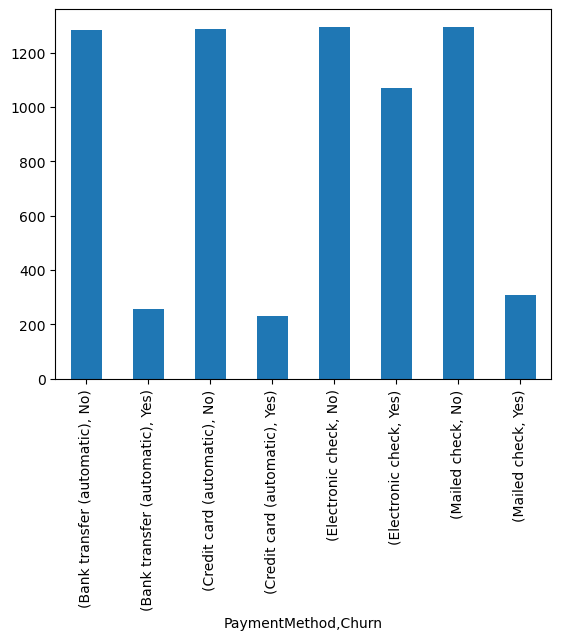

In [189]:
df.groupby('PaymentMethod').Churn.value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

# MonthlyCharges

In [190]:
MonthlyCharges = df['MonthlyCharges'].info()
MonthlyCharges

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7042
Series name: MonthlyCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 367.9 KB


In [191]:
MonthlyCharges_cat_col =['Churn']
for col in MonthlyCharges_cat_col:
    print(f'MonthlyCharges{col} :')
    print(df.groupby('MonthlyCharges')['Churn'].value_counts())
    print('\n')
    print('--'*50)

MonthlyChargesChurn :
MonthlyCharges  Churn
18.25           No       1
18.40           No       1
18.55           No       1
18.70           No       2
18.75           No       1
                        ..
118.20          No       1
118.35          Yes      1
118.60          No       2
118.65          No       1
118.75          No       1
Name: count, Length: 2369, dtype: int64


----------------------------------------------------------------------------------------------------


<Axes: ylabel='Frequency'>

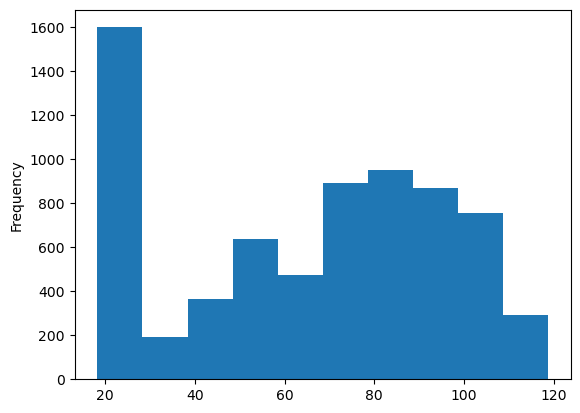

In [192]:
df['MonthlyCharges'].plot(kind= 'hist')

# TotalCharges

In [193]:
TotalCharges = df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 367.9 KB


# Churn

In [194]:
Churn = df['Churn'].info()

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7042
Series name: Churn
Non-Null Count  Dtype 
--------------  ----- 
7032 non-null   object
dtypes: object(1)
memory usage: 367.9+ KB


Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

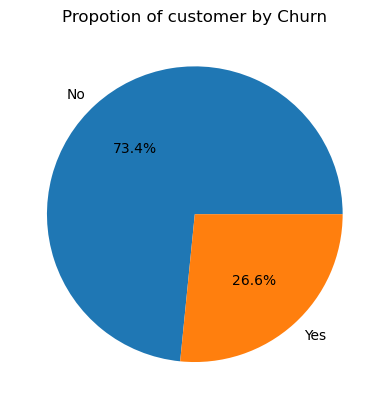

In [195]:
# Count the number of customer for each PaymentMethod

partner_count = df['Churn'].value_counts()
display(df['Churn'].value_counts(normalize = True) *100)

# Ploting Pie Chart

plt.pie(partner_count,labels = partner_count.index,autopct = '%1.1f%%')
plt.title('Propotion of customer by Churn')
plt.show()

In [196]:
Churn_Monthlycharges = df.groupby('Churn')['MonthlyCharges'].mean()
Churn_Monthlycharges

Churn
No     61.307408
Yes    74.441332
Name: MonthlyCharges, dtype: float64

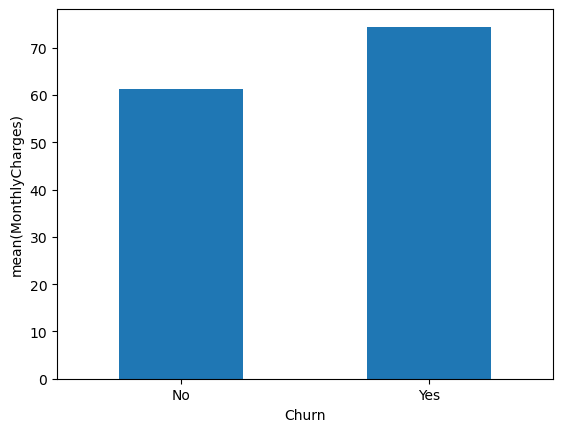

In [197]:
df.groupby('Churn').MonthlyCharges.mean().plot(kind='bar')
plt.ylabel('mean(MonthlyCharges)')
plt.xticks(rotation=0)
plt.show()

In [198]:
TotalCharges_Churn=df.groupby('Churn')['TotalCharges'].mean()
TotalCharges_Churn

Churn
No     2555.344141
Yes    1531.796094
Name: TotalCharges, dtype: float64

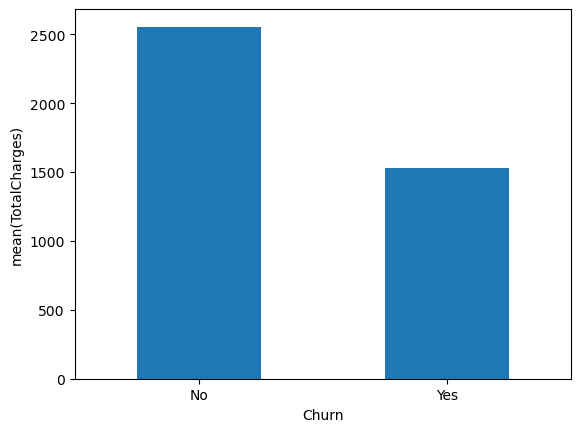

In [199]:
df.groupby('Churn').TotalCharges.mean().plot(kind='bar')
plt.ylabel('mean(TotalCharges)')
plt.xticks(rotation=0)
plt.show()

In [200]:
num_cols = df.describe(exclude='O')
num_cols

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


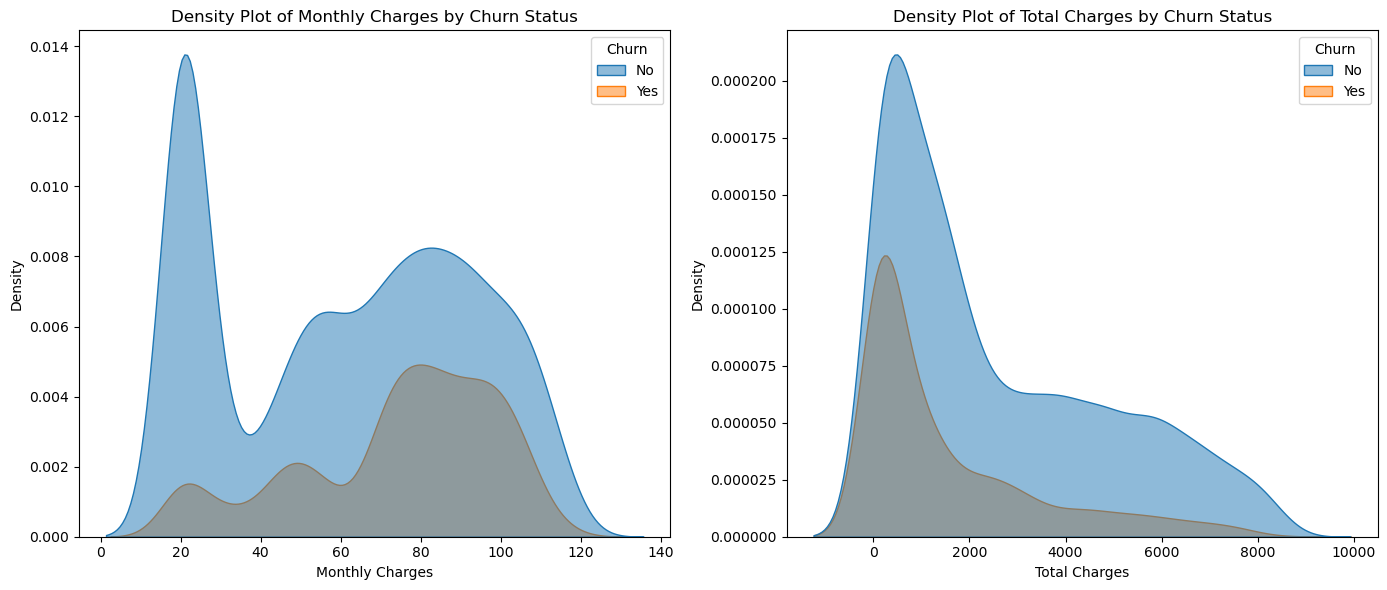

In [201]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Monthly Charges
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", fill=True, alpha=0.5, ax=axes[0])
axes[0].set_title('Density Plot of Monthly Charges by Churn Status')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Density')

# Plot for Total Charges
sns.kdeplot(data=df, x="TotalCharges", hue="Churn", fill=True, alpha=0.5, ax=axes[1])
axes[1].set_title('Density Plot of Total Charges by Churn Status')
axes[1].set_xlabel('Total Charges')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()


In [202]:
correlation_matrix = df.select_dtypes(include=['float64','int64']).corr()
correlation_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


<Axes: >

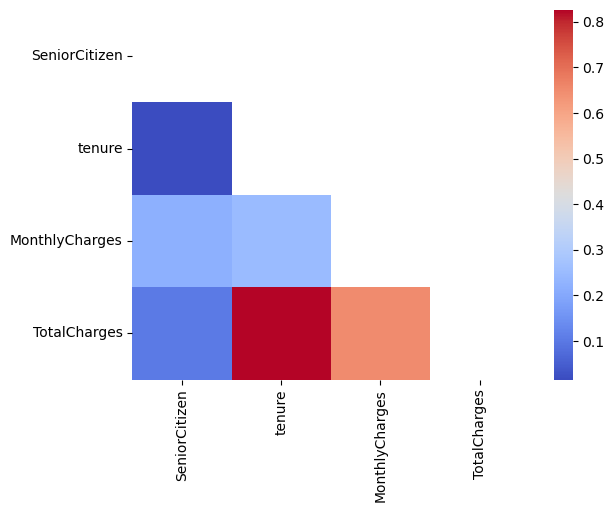

In [203]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")

<Axes: >

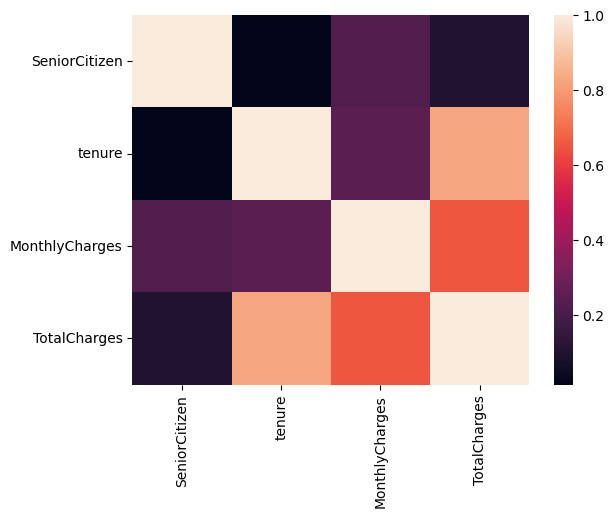

In [204]:
# Heatmap
# to get correlation values on heat map
sns.heatmap(df[df.describe().columns].corr(),annot=False)

In [205]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [206]:
df['AverageMonthlySpend'] = df['TotalCharges']/df['tenure']

In [207]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['category', 'object']).columns

# Apply OneHotEncoder
encoder = OneHotEncoder(sparse=False)  # Setting drop='first' to avoid multicollinearity
encoded_data = encoder.fit_transform(df[categorical_cols])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from the DataFrame
df.drop(columns=categorical_cols, inplace=True)

# Reset index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,AverageMonthlySpend,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,29.850000,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,34,56.95,1889.50,55.573529,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0,2,53.85,108.15,54.075000,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0,45,42.30,1840.75,40.905556,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,2,70.70,151.65,75.825000,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,82.937500,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
7028,0,72,103.20,7362.90,102.262500,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7029,0,11,29.60,346.45,31.495455,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7030,1,4,74.40,306.60,76.650000,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [208]:
df.drop('Churn_No', axis=1, inplace=True)

In [209]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,AverageMonthlySpend,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,29.850000,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,34,56.95,1889.50,55.573529,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2,53.85,108.15,54.075000,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0,45,42.30,1840.75,40.905556,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,75.825000,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [210]:
# rename churn_yes to churn
df.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)

# Model Building

In [211]:
# split data into X and y
X = df.drop('Churn', axis=1)
y = df['Churn']
# data into train and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Feature Importances:
SeniorCitizen: 0.01570513104664572
tenure: 0.10240957045782872
MonthlyCharges: 0.1350161539194411
TotalCharges: 0.15150232604014452
AverageMonthlySpend: 0.14345084673116829
gender_Female: 0.011573099683384982
gender_Male: 0.01174498790608163
Partner_No: 0.009774112849579564
Partner_Yes: 0.008572132447444003
Dependents_No: 0.008319509939597802
Dependents_Yes: 0.009142364186569328
PhoneService_No: 0.0014838814511358555
PhoneService_Yes: 0.0017690548157215868
MultipleLines_No: 0.007449210420932872
MultipleLines_No phone service: 0.0018476142201928208
MultipleLines_Yes: 0.007595118277653955
InternetService_DSL: 0.00129977886631662
InternetService_Fiber optic: 0.04272713597250244
InternetService_No: 0.00012470751107763849
OnlineSecurity_No: 0.01609674411497198
OnlineSecurity_No internet service: 3.152652341370981e-05
OnlineSecurity_Yes: 0.006259838143312022
OnlineBackup_No: 0.00896287305095323
OnlineBackup_No internet service: 0.00022233454061451429
OnlineBackup_Yes: 0.

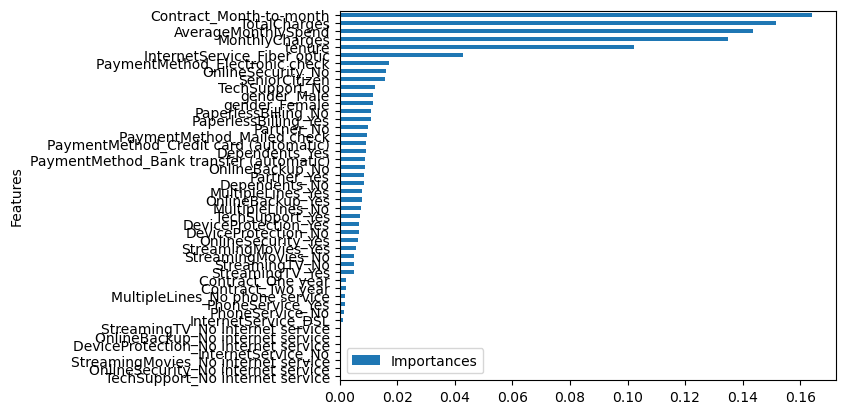

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [212]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the data
rf.fit(X, y)

# Get the feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Print the feature importances
print("Feature Importances:")
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance}")

# Creating a dataframe for visualization
important_features = pd.DataFrame({'Features':feature_names,"Importances":importances})
important_features.set_index('Features',inplace=True)
sorted_importances = important_features.sort_values(by = 'Importances')
sorted_importances.plot(kind='barh')
plt.show()
plt.figure(figsize=(10,8))

In [213]:
sorted_importances.sort_values(by ='Importances', ascending=False)

,Importances
Features,
Contract_Month-to-month,0.164094
TotalCharges,0.151502
AverageMonthlySpend,0.143451
MonthlyCharges,0.135016
tenure,0.102410
InternetService_Fiber optic,0.042727
PaymentMethod_Electronic check,0.017063
OnlineSecurity_No,0.016097
SeniorCitizen,0.015705


In [214]:
sorted_importances[sorted_importances.values>=0.005098]

,Importances
Features,
StreamingTV_Yes,0.005098
StreamingTV_No,0.005119
StreamingMovies_No,0.005133
StreamingMovies_Yes,0.005845
OnlineSecurity_Yes,0.006260
DeviceProtection_No,0.006613
DeviceProtection_Yes,0.006662
TechSupport_Yes,0.007055
MultipleLines_No,0.007449


In [215]:
new_X = X[sorted_importances[sorted_importances.values>=0.017634].index]

In [216]:
X_train,X_test,y_train,y_test=train_test_split(new_X,y,test_size=0.20,random_state=1)

In [217]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5625, 6), (1407, 6), (5625,), (1407,))

In [218]:
sc=StandardScaler()

X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [219]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [220]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [221]:
from sklearn.metrics import confusion_matrix ,accuracy_score,precision_score,f1_score,recall_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report


Logistic Regression Classifier :
Accuracy: 0.7825159914712153
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1041
         1.0       0.60      0.48      0.54       366

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



Text(0.5, 1.0, 'Confusion Matrix- Logistic Regression Classifier ')

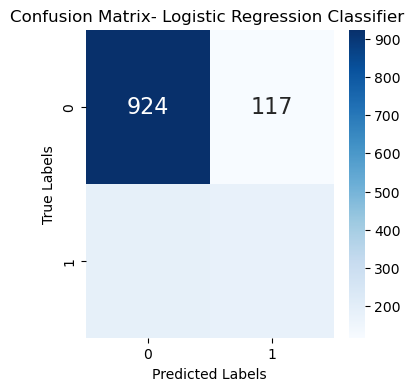

In [222]:
# Predictions
# Make predictions on the non-oversampled test set

y_pred_ = lr.predict(X_test)
y_proba_ = lr.predict_proba(X_test)[:, 1]

# Create confusion matrix for non-oversampled model
accuracy = accuracy_score(y_test, y_pred_)
cm_Churn = confusion_matrix(y_test, y_pred_ )
classification_report_result = classification_report(y_test, y_pred_)

# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_, tpr_, thresholds_ = roc_curve(y_test, y_proba_)
auc_ = roc_auc_score(y_test, y_proba_)

# Evaluate the non-oversampled model
print("\nLogistic Regression Classifier :")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred_))

# Create heatmap for non-oversampled model
plt.figure(figsize=(4, 4))
sns.heatmap(cm_Churn, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- Logistic Regression Classifier ')

In [223]:
y_test.value_counts()

Churn
0.0    1041
1.0     366
Name: count, dtype: int64

In [224]:
# Predicting for training and testing 
ytrain_pred = lr.predict(X_train)
ytest_pred = lr.predict(X_test)

In [225]:
# Model Evaluation

train_score = lr.score(X_train,y_train)
test_score = lr.score(X_test,y_test)
print(f'Training Score {round(train_score,2)}, Testing Score {round(test_score,2)}')

Training Score 0.79, Testing Score 0.78


# Random Forest classifier

In [226]:
# Create and train a Random Forest classifier on the data
rf_ = RandomForestClassifier()
rf_.fit(X_train, y_train)

RandomForestClassifier()


Decision Tree Classifier :
Accuracy: 0.7661691542288557
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84      1041
         1.0       0.56      0.50      0.53       366

    accuracy                           0.77      1407
   macro avg       0.69      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



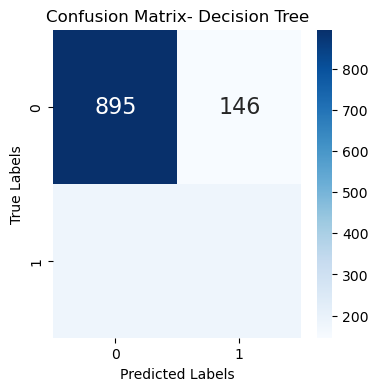

In [227]:
# Predict probabilities on the non-oversampled test set
y_pred_ = rf_.predict(X_test)
y_proba_ = rf_.predict_proba(X_test)[:, 1]

# Create confusion matrix for non-oversampled model
accuracy = accuracy_score(y_test, y_pred_)
cm_Churn = confusion_matrix(y_test, y_pred_)
classification_report_result = classification_report(y_test, y_pred_)

# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_, tpr_, thresholds_ = roc_curve(y_test, y_proba_)
auc_ = roc_auc_score(y_test, y_proba_)

# Create heatmap for non-oversampled model
plt.figure(figsize=(4, 4))
sns.heatmap(cm_Churn, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- Decision Tree')

# Evaluate the non-oversampled model
print("\nDecision Tree Classifier :")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred_))

In [228]:
# Predicting for training and testing 
ytrain_pred = rf_.predict(X_train)
ytest_pred = rf_.predict(X_test)

In [229]:
# Model Evaluation

train_score = rf_.score(X_train,y_train)
test_score = rf_.score(X_test,y_test)
print(f'Training Score {round(train_score,2)}, Testing Score {round(test_score,2)}')

Training Score 0.99, Testing Score 0.77


# Roc and Auc

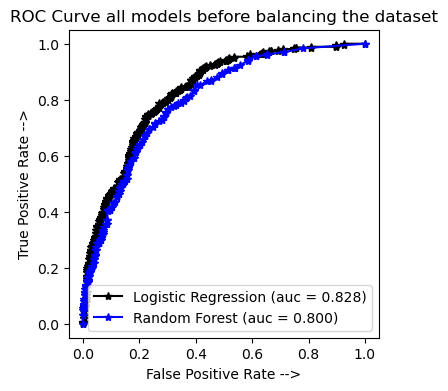

In [230]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities on the non-oversampled test set (Logistic Regression)
y_proba_lr = lr.predict_proba(X_test)[:, 1]
# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_lr, tpr_lr, thresholds_ = roc_curve(y_test, y_proba_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)

# Predict probabilities on the non-oversampled test set (Random Forest)
y_proba_rf = rf_.predict_proba(X_test)[:, 1]
# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_rf, tpr_rf, thresholds_ = roc_curve(y_test, y_proba_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_, tpr_, thresholds_ = roc_curve(y_test, y_proba_)
auc_ = roc_auc_score(y_test, y_proba_)

plt.figure(figsize=(4, 4), dpi=100)
plt.plot(fpr_lr, tpr_lr, marker='*',color='black' ,label='Logistic Regression (auc = %0.3f)' % auc_lr)
plt.plot(fpr_rf, tpr_rf, marker='*',color='blue' ,label='Random Forest (auc = %0.3f)' % auc_rf)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title('ROC Curve all models before balancing the dataset')
plt.legend(loc='lower right')
plt.legend()
plt.show()


In [231]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Grid Search with Cross Validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_clf = grid_search.best_estimator_
print("Training Accuracy:", accuracy_score(y_train, best_clf.predict(X_train)))
print("Testing Accuracy:", accuracy_score(y_test, best_clf.predict(X_test)))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training Accuracy: 0.8007111111111112
Testing Accuracy: 0.7789623312011372


In [232]:
# Initialize an empty list to store model scores
model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__max_depth': [None, 10, 20]}),  # Add hyperparameters for Random Forest
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Gradient Boosting
    
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__penalty': ['l1', 'l2']}),  # Add hyperparameters for Logistic Regression
    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'model__n_neighbors': [3, 5, 7],
         'model__weights': ['uniform', 'distance']}),  # Add hyperparameters for KNN
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'model__max_depth': [None, 10, 20],
         'model__min_samples_split': [2, 5, 10]}),  # Add hyperparameters for Decision Tree
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Ada Boost
    ('XG Boost', XGBClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for XG Boost
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=2)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)
    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", accuracy.round(3),"%")
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the overall best model
print("Best Model:")
print("Test Accuracy:", best_accuracy)
print("Model Pipeline:", best_model, "with accuracy", best_accuracy.round(2), "%")

Model: Random Forest
Test Accuracy: 0.786 %

Model: Gradient Boosting
Test Accuracy: 0.791 %

Model: Logistic Regression
Test Accuracy: 0.733 %

Model: K-Nearest Neighbors
Test Accuracy: 0.786 %

Model: Decision Tree
Test Accuracy: 0.763 %

Model: Ada Boost
Test Accuracy: 0.8 %

Model: XG Boost
Test Accuracy: 0.785 %

Best Model:
Test Accuracy: 0.7995735607675906
Model Pipeline: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 AdaBoostClassifier(learning_rate=0.05, n_estimators=200,
                                    random_state=42))]) with accuracy 0.8 %


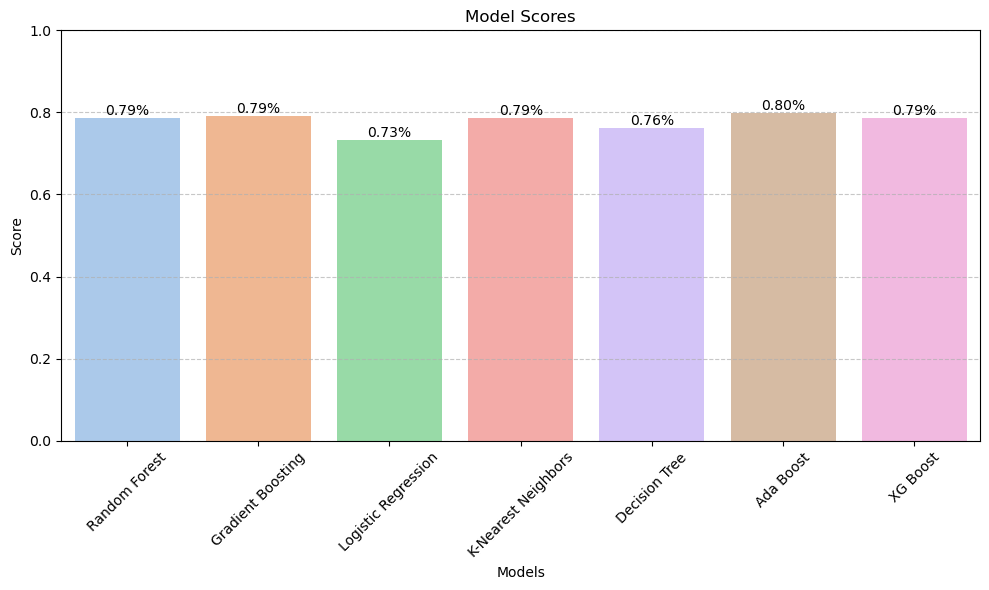

In [233]:
# Define a color palette for the bars
colors = sns.color_palette('pastel', n_colors=len(scores_df))

# Create a bar plot of models and their scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=scores_df, palette=colors)

# Add text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [234]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import pandas as pd
from scipy.stats import uniform, randint

# UpSampling
sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X, y)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res, test_size=0.2)

# Initialize an empty list to store model scores
model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'max_depth': [None, 10, 20]}),  # Add hyperparameters for Random Forest
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Gradient Boosting
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'C': [0.1, 1, 10],
         'penalty': ['l1', 'l2']}),  # Add hyperparameters for Logistic Regression
    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7],
         'weights': ['uniform', 'distance']}),  # Add hyperparameters for KNN
    
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Ada Boost
    ('XG Boost', XGBClassifier(random_state=42),
        {'max_depth': randint(3, 6), 
         'learning_rate': uniform(0.01, 0.2),  
         'n_estimators': randint(100, 300),  
         'subsample': uniform(0.8, 0.2)}),  # Add hyperparameters for XG Boost
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using RandomizedSearchCV for XG Boost
    if name == 'XG Boost':
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                           n_iter=100, cv=3, verbose=0, random_state=42, n_jobs=-1)
        random_search.fit(Xr_train, yr_train)
        pipeline = random_search.best_estimator_
    # Hyperparameter tuning using GridSearchCV for other models
    elif param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=2, verbose=0)
        grid_search.fit(Xr_train, yr_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(Xr_train, yr_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(Xr_test)

    # Calculate accuracy score
    accuracy = accuracy_score(yr_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)

    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", accuracy.round(3),"%")
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the overall best model
print("Best Model:")
print("Test Accuracy:", best_accuracy)
print("Model Pipeline:", best_model, "with accuracy", best_accuracy.round(2), "%")

Model: Random Forest
Test Accuracy: 0.959 %

Model: Gradient Boosting
Test Accuracy: 0.961 %

Model: Logistic Regression
Test Accuracy: 0.925 %

Model: K-Nearest Neighbors
Test Accuracy: 0.989 %

Model: Ada Boost
Test Accuracy: 0.959 %

Model: XG Boost
Test Accuracy: 0.962 %

Best Model:
Test Accuracy: 0.9889267461669506
Model Pipeline: KNeighborsClassifier(n_neighbors=3, weights='distance') with accuracy 0.99 %


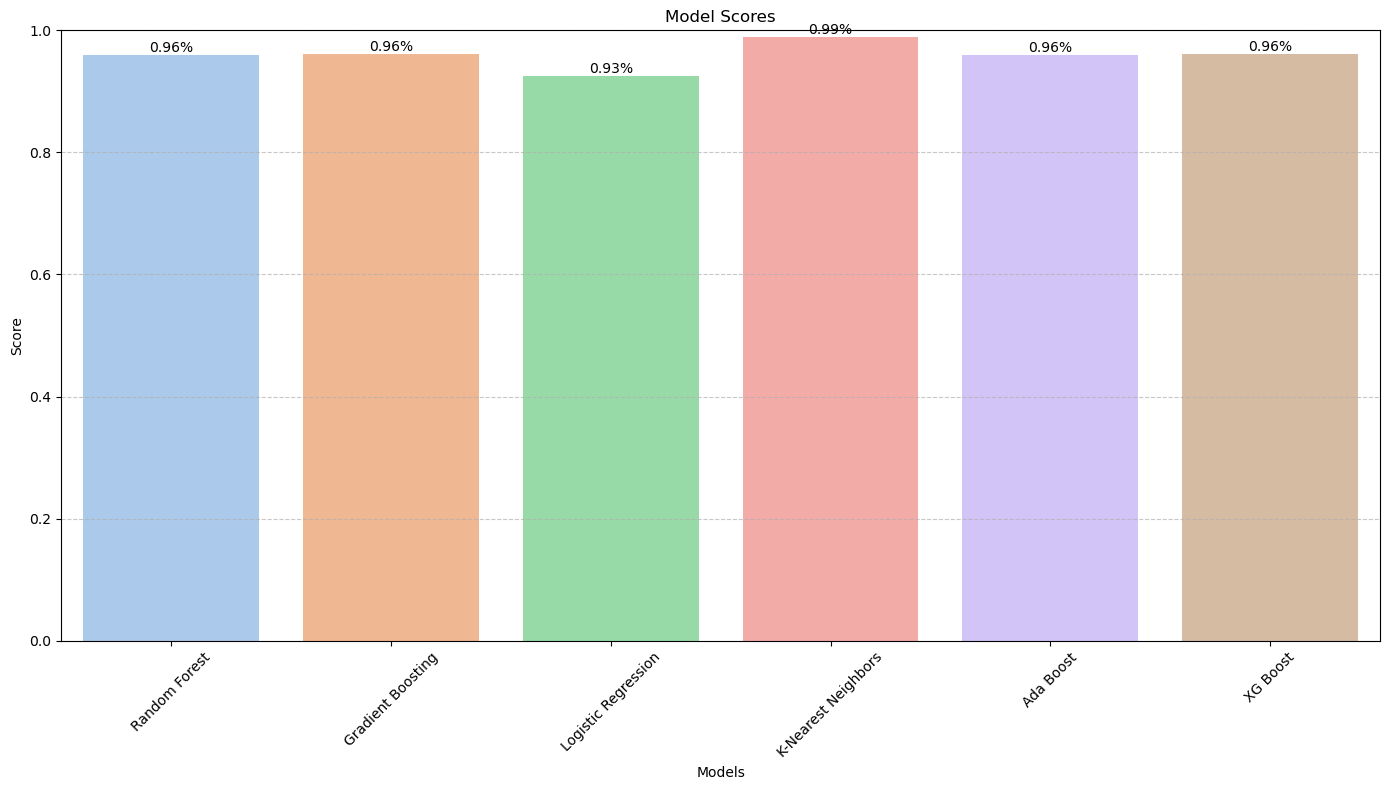

In [235]:
# Define a color palette for the bars
colors = sns.color_palette('pastel', n_colors=len(scores_df))

# Create a bar plot of models and their scores
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Model', y='Accuracy', data=scores_df, palette=colors)

# Add text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

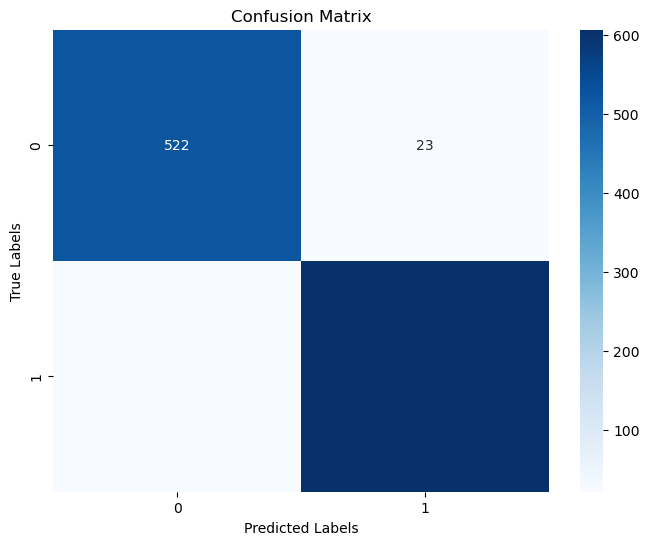

In [239]:
# Compute confusion matrix
conf_matrix = confusion_matrix(yr_test, y_pred)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [236]:
import pickle

In [238]:
import pickle

# Save the trained model
with open("logistic_regression_model.pkl", "wb") as f:
    pickle.dump(lr, f)